In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 7.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install contractions

     |████████████████████████████████| 283 kB 8.1 MB/s 
     |████████████████████████████████| 321 kB 65.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=cc7657f740faae0a4fe7ef4f09bc05be025b7f16613611c856dee781b3439969
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import contractions
%matplotlib inline  

In [ ]:
import pandas
hotel=pd.read_csv("/content/sample_data/london_hotel_reviews1.csv")  
hotel 

Unnamed: 0                                                  0
0               0  For the location this wasn't too bad. However,...
1               1  Spent a couple of nights in this hotel and it ...
2               2  My partner and I stayed here and really couldn...
3               3  Visited London for three days with my daughter...
4               4  Was fantastic to be back in a hotel again and ...
...           ...                                                ...
12727       12727  My family of 3 stayed in a triple for 9 nights...
12728       12728  I stayed here just after Christmas for a few d...
12729       12729  We just got back from a week long holiday in L...
12730       12730  The Strand Palace is ideally located on the St...
12731       12731  Have stayed on business here many times (total...

[12732 rows x 2 columns]

In [ ]:
hotel.columns=['Index','Reviews']

In [ ]:
hotel = hotel.drop('Index', 1)

In [ ]:
hotel.head()

Reviews
0  For the location this wasn't too bad. However,...
1  Spent a couple of nights in this hotel and it ...
2  My partner and I stayed here and really couldn...
3  Visited London for three days with my daughter...
4  Was fantastic to be back in a hotel again and ...


#EXPLORATORY DATA ANALYSIS (EDA)
##Text Pre-Processing
##Expanding Contractions


In [ ]:
import re

In [ ]:
#Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)

In [ ]:
# lets apply this function
hotel['Reviews'] = hotel.apply(lambda x: remove_special_characters(x['Reviews']), axis = 1)

In [ ]:
hotel['Reviews']

0        For the location this wasn t too bad  However ...
1        Spent a couple of nights in this hotel and it ...
2        My partner and I stayed here and really couldn...
3        Visited London for three days with my daughter...
4        Was fantastic to be back in a hotel again and ...
                               ...                        
12727    My family of 3 stayed in a triple for 9 nights...
12728    I stayed here just after Christmas for a few d...
12729    We just got back from a week long holiday in L...
12730    The Strand Palace is ideally located on the St...
12731    Have stayed on business here many times  total...
Name: Reviews, Length: 12732, dtype: object

In [ ]:
###### Spell Check

In [ ]:
!pip install autocorrect

     |████████████████████████████████| 622 kB 7.6 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621853 sha256=6b661e8778639c6be27d75e11753d58daa5439dc52716da6f8fd7ff587579ae5
  Stored in directory: /root/.cache/pip/wheels/3d/8e/bd/f6fd900a056a031bf710a00bca338d86f43b83f0c25ab5242f
Successfully built autocorrect


In [ ]:
from autocorrect import Speller
spell = Speller(lang = 'en')

def spell_check(data):
    return spell(data)

In [ ]:
hotel.Reviews = hotel.Reviews.apply(spell_check)
hotel.head

<bound method NDFrame.head of                                                  Reviews
0      For the location this wasn t too bad  However ...
1      Spent a couple of nights in this hotel and it ...
2      My partner and I stayed here and really couldn...
3      Visited London for three days with my daughter...
4      Was fantastic to be back in a hotel again and ...
...                                                  ...
12727  My family of 3 stayed in a triple for 9 nights...
12728  I stayed here just after Christmas for a few d...
12729  We just got back from a week long holiday in L...
12730  The Strand Palace is ideally located on the St...
12731  Have stayed on business here many times  total...

[12732 rows x 1 columns]>

In [ ]:
hotel['no_contract'] = hotel['Reviews'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [ ]:
hotel['expanded_text'] = [' '.join(map(str, l)) for l in hotel['no_contract']]

In [ ]:
hotel.head()

Reviews  ...                                      expanded_text
0  For the location this wasn t too bad  However ...  ...  For the location this wasn t too bad However w...
1  Spent a couple of nights in this hotel and it ...  ...  Spent a couple of nights in this hotel and it ...
2  My partner and I stayed here and really couldn...  ...  My partner and I stayed here and really couldn...
3  Visited London for three days with my daughter...  ...  Visited London for three days with my daughter...
4  Was fantastic to be back in a hotel again and ...  ...  Was fantastic to be back in a hotel again and ...

[5 rows x 3 columns]

What are contractions?

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

We are going to add a new column to our dataframe called 'expanded_text' and apply contraction function to 'content' column which will expand any contractions
In the 1st row we can see "wasn't" is expanded to "was not".

#### Removing Punctuations

In [ ]:
hotel['no_punc'] = hotel['expanded_text'].str.replace('[^\w\s]','')
hotel.head()

Reviews  ...                                            no_punc
0  For the location this wasn t too bad  However ...  ...  For the location this wasn t too bad However w...
1  Spent a couple of nights in this hotel and it ...  ...  Spent a couple of nights in this hotel and it ...
2  My partner and I stayed here and really couldn...  ...  My partner and I stayed here and really couldn...
3  Visited London for three days with my daughter...  ...  Visited London for three days with my daughter...
4  Was fantastic to be back in a hotel again and ...  ...  Was fantastic to be back in a hotel again and ...

[5 rows x 4 columns]

#### Tokenization

In [ ]:
# Tokenization of the string i.e divding the string into separate words

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
hotel['tokenized'] = hotel['no_punc'].apply(word_tokenize)
hotel.head()

Reviews  ...                                          tokenized
0  For the location this wasn t too bad  However ...  ...  [For, the, location, this, wasn, t, too, bad, ...
1  Spent a couple of nights in this hotel and it ...  ...  [Spent, a, couple, of, nights, in, this, hotel...
2  My partner and I stayed here and really couldn...  ...  [My, partner, and, I, stayed, here, and, reall...
3  Visited London for three days with my daughter...  ...  [Visited, London, for, three, days, with, my, ...
4  Was fantastic to be back in a hotel again and ...  ...  [Was, fantastic, to, be, back, in, a, hotel, a...

[5 rows x 5 columns]

In [ ]:
#### Converting all Characters to Lowercase

In [ ]:
# Converting Uppercase letters to Lowercase

In [ ]:
hotel['lower'] = hotel['tokenized'].apply(lambda x: [word.lower() for word in x])
hotel.head()

Reviews  ...                                              lower
0  For the location this wasn t too bad  However ...  ...  [for, the, location, this, wasn, t, too, bad, ...
1  Spent a couple of nights in this hotel and it ...  ...  [spent, a, couple, of, nights, in, this, hotel...
2  My partner and I stayed here and really couldn...  ...  [my, partner, and, i, stayed, here, and, reall...
3  Visited London for three days with my daughter...  ...  [visited, london, for, three, days, with, my, ...
4  Was fantastic to be back in a hotel again and ...  ...  [was, fantastic, to, be, back, in, a, hotel, a...

[5 rows x 6 columns]

In [ ]:
#### Number of stopwords

In [ ]:
# Adding a column "stopwords" which shows the count of stopwords in the text.

In [ ]:
from nltk.corpus import stopwords, wordnet

In [ ]:
stop = stopwords.words('english')

hotel['stopwords'] = hotel['expanded_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
hotel.head()


Reviews  ... stopwords
0  For the location this wasn t too bad  However ...  ...        52
1  Spent a couple of nights in this hotel and it ...  ...        18
2  My partner and I stayed here and really couldn...  ...        62
3  Visited London for three days with my daughter...  ...        74
4  Was fantastic to be back in a hotel again and ...  ...        19

[5 rows x 7 columns]

In [ ]:
#### Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
hotel['stopwords_removed'] = hotel['lower'].apply(lambda x: [word for word in x if word not in stop_words])
hotel.head()

Reviews  ...                                  stopwords_removed
0  For the location this wasn t too bad  However ...  ...  [location, bad, however, smallest, hotel, room...
1  Spent a couple of nights in this hotel and it ...  ...  [spent, couple, nights, hotel, fantastic, hote...
2  My partner and I stayed here and really couldn...  ...  [partner, stayed, really, fault, hotel, staff,...
3  Visited London for three days with my daughter...  ...  [visited, london, three, days, daughter, mid, ...
4  Was fantastic to be back in a hotel again and ...  ...  [fantastic, back, hotel, also, somewhere, real...

[5 rows x 8 columns]

In [ ]:
#### Number of words

In [ ]:
#Number of Words in single review
hotel['word_count'] = hotel['stopwords_removed'].apply(lambda x: len(str(x).split(" ")))
hotel.head()

Reviews  ... word_count
0  For the location this wasn t too bad  However ...  ...         53
1  Spent a couple of nights in this hotel and it ...  ...         17
2  My partner and I stayed here and really couldn...  ...         56
3  Visited London for three days with my daughter...  ...         76
4  Was fantastic to be back in a hotel again and ...  ...         22

[5 rows x 9 columns]

In [ ]:
#### Number of Characters

In [ ]:
#Number of characters in single review 
hotel['char_count'] = hotel['no_punc'].str.len() 
hotel.head()

Reviews  ... char_count
0  For the location this wasn t too bad  However ...  ...        548
1  Spent a couple of nights in this hotel and it ...  ...        208
2  My partner and I stayed here and really couldn...  ...        652
3  Visited London for three days with my daughter...  ...        774
4  Was fantastic to be back in a hotel again and ...  ...        239

[5 rows x 10 columns]

In [ ]:
#### Wordcloud 

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Joining the list into one string/text
hotel['stp_rem_str'] = [' '.join(map(str, l)) for l in hotel['stopwords_removed']]
text = ' '.join(hotel['stp_rem_str'])

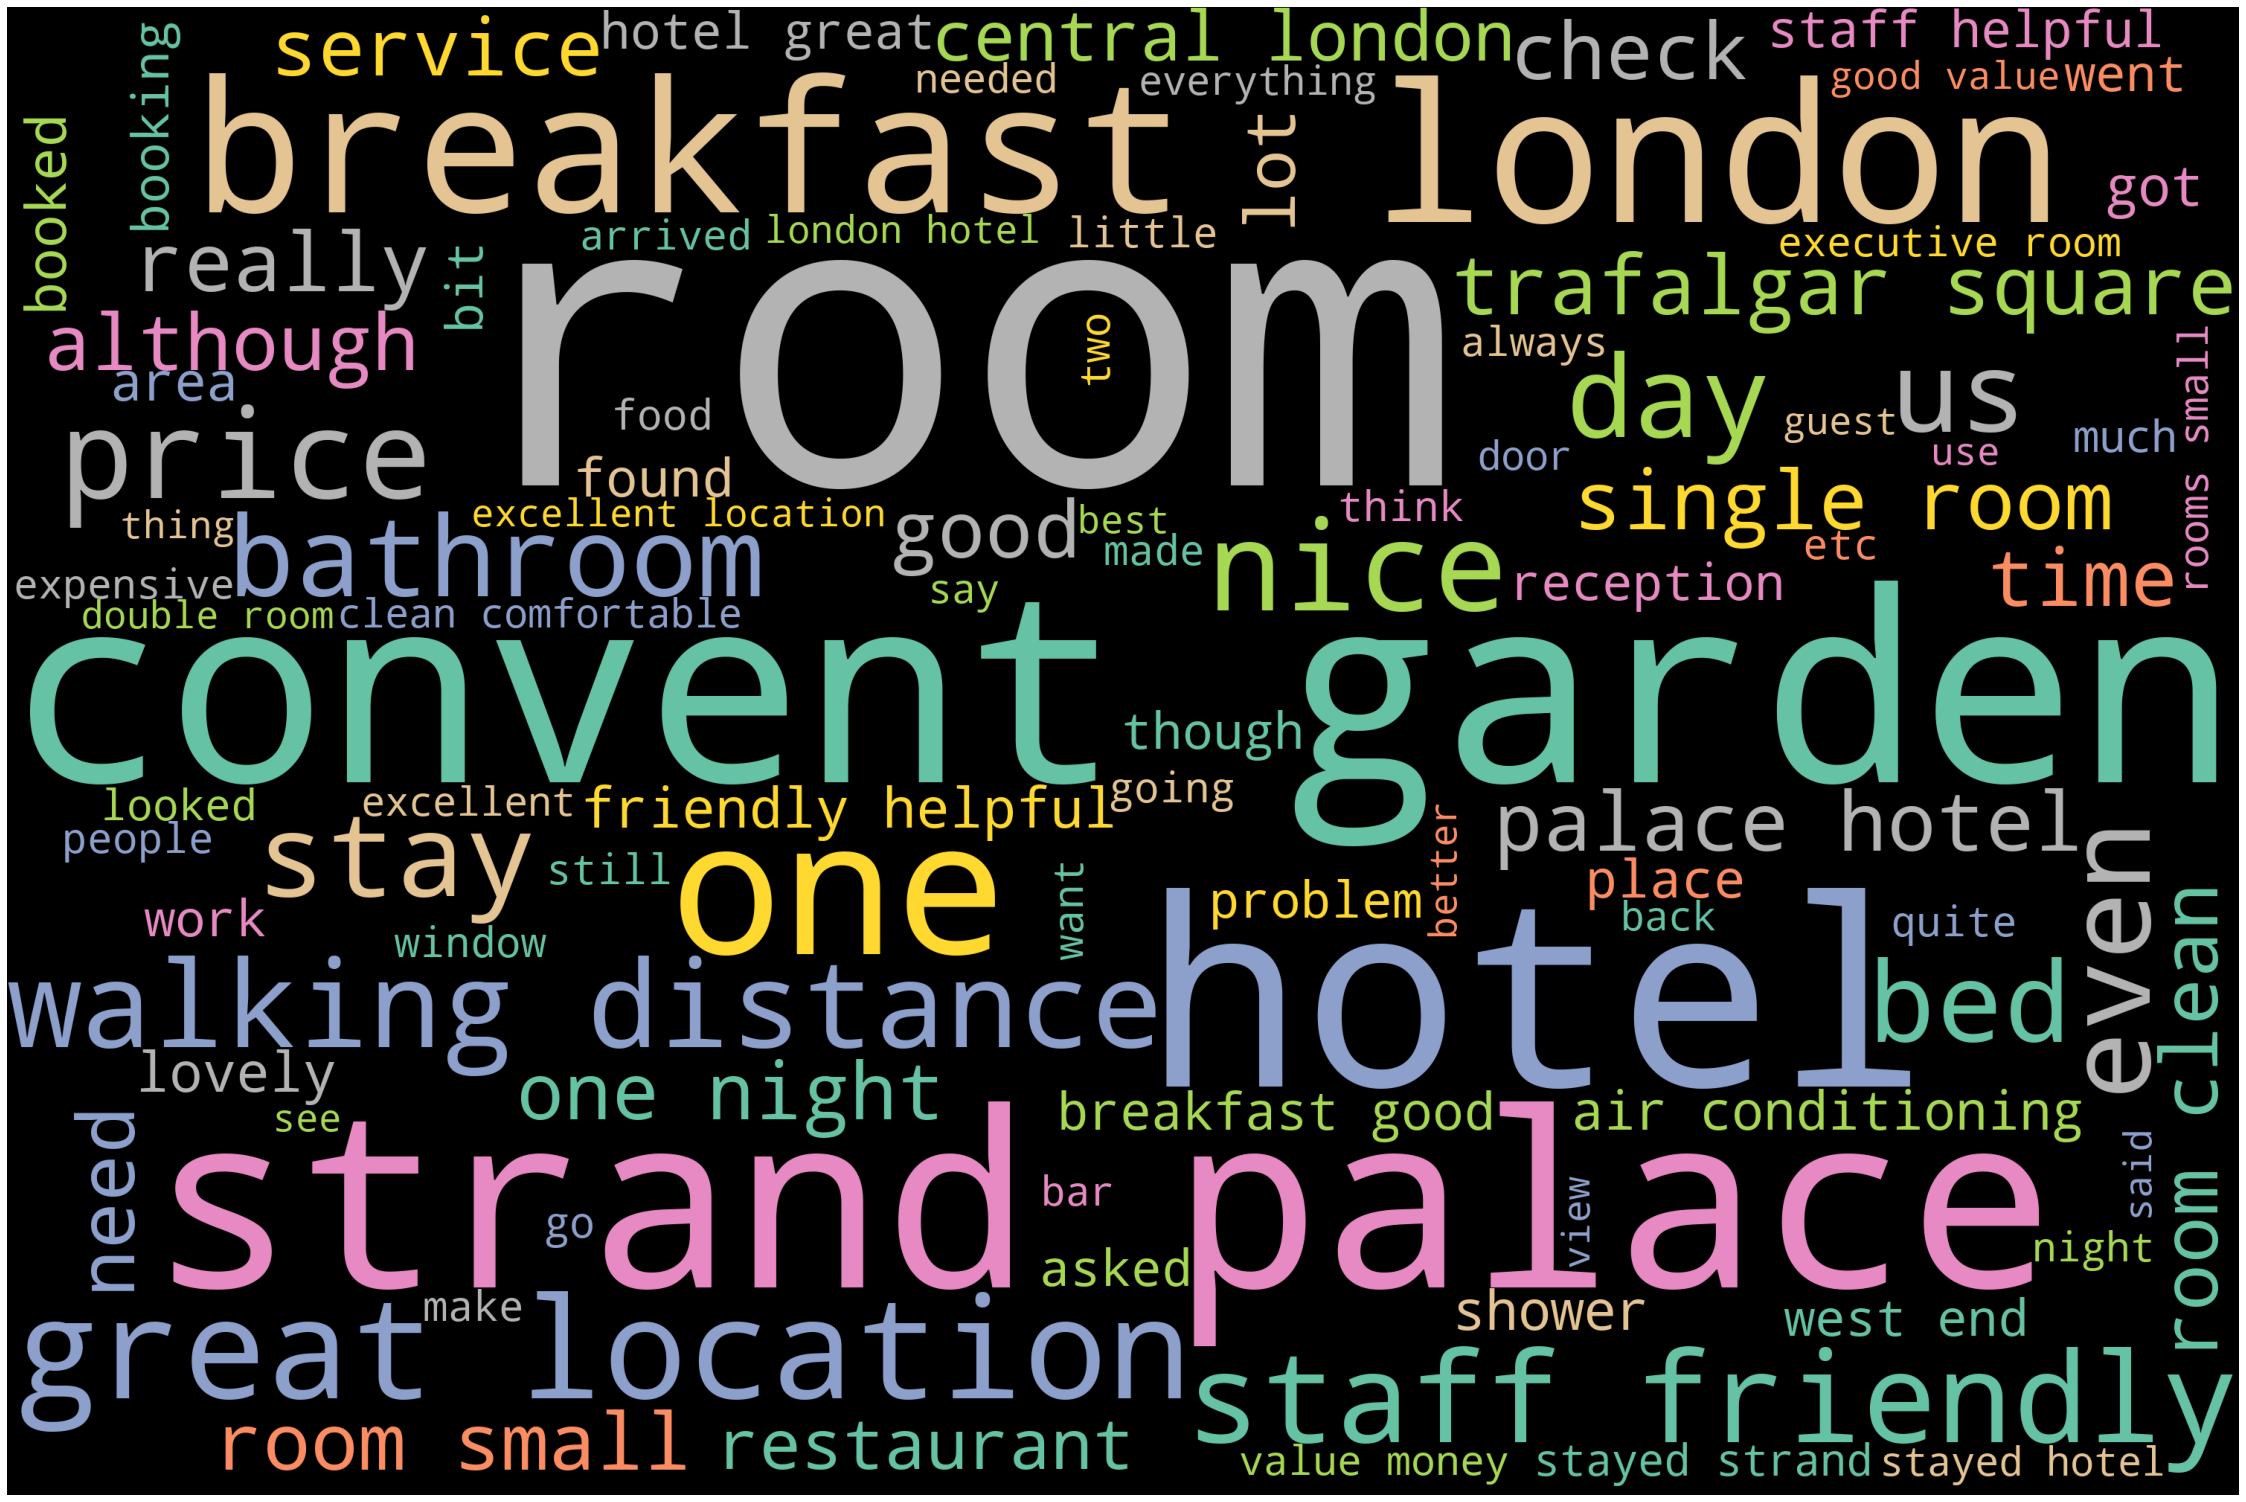

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
#### Stemming

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
hotel['stemmi']=hotel['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
hotel.head()

Reviews  ...                                             stemmi
0  For the location this wasn t too bad  However ...  ...  locat bad howev smallest hotel room ever stay ...
1  Spent a couple of nights in this hotel and it ...  ...  spent coupl night hotel fantast hotel central ...
2  My partner and I stayed here and really couldn...  ...  partner stay realli fault hotel staff friendli...
3  Visited London for three days with my daughter...  ...  visit london three day daughter mid juli book ...
4  Was fantastic to be back in a hotel again and ...  ...  fantast back hotel also somewher realli centra...

[5 rows x 12 columns]

In [ ]:
#### Lemmatization


In [ ]:
from textblob import Word

In [ ]:
hotel['lemma'] = hotel['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
hotel.head()

Reviews  ...                                              lemma
0  For the location this wasn t too bad  However ...  ...  locat bad howev smallest hotel room ever stay ...
1  Spent a couple of nights in this hotel and it ...  ...  spent coupl night hotel fantast hotel central ...
2  My partner and I stayed here and really couldn...  ...  partner stay realli fault hotel staff friendli...
3  Visited London for three days with my daughter...  ...  visit london three day daughter mid juli book ...
4  Was fantastic to be back in a hotel again and ...  ...  fantast back hotel also somewher realli centra...

[5 rows x 13 columns]

In [ ]:
hotel[['stemmi','lemma']].head()

stemmi                                              lemma
0  locat bad howev smallest hotel room ever stay ...  locat bad howev smallest hotel room ever stay ...
1  spent coupl night hotel fantast hotel central ...  spent coupl night hotel fantast hotel central ...
2  partner stay realli fault hotel staff friendli...  partner stay realli fault hotel staff friendli...
3  visit london three day daughter mid juli book ...  visit london three day daughter mid juli book ...
4  fantast back hotel also somewher realli centra...  fantast back hotel also somewher realli centra...

In [ ]:
####Clean The Data


In [ ]:
import re

In [ ]:
def cleantext(text):
    text = re.sub(r"â€™", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text) # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"______________", "", text) # Remove _____
    
    
    return text

In [ ]:
hotel['cleaned'] = hotel['lemma'].apply(cleantext)

In [ ]:
hotel.head()

Reviews  ... sentiment
0  For the location this wasn t too bad  However ...  ...  Negative
1  Spent a couple of nights in this hotel and it ...  ...  Positive
2  My partner and I stayed here and really couldn...  ...  Positive
3  Visited London for three days with my daughter...  ...  Positive
4  Was fantastic to be back in a hotel again and ...  ...  Positive

[5 rows x 19 columns]

In [ ]:
#### Top 25 most used words.

In [ ]:
reviews=np.array(hotel['cleaned'])
s=str(reviews)
token = word_tokenize(s)
print(token)

['[', "'locat", 'bad', 'howev', 'smallest', 'hotel', 'room', 'ever', 'stay', 'small', 'doubl', 'bed', 'wall', 'particularli', 'com', 'pair', 'room', 'includ', 'mani', 'bathroom', 'floor', 'end', 'put', 'larg', 'towel', 'floor', 'stop', 'stare', 'make', 'consist', 'long', 'black', 'hair', 'bed', 'duet', 'pull', 'back', 'find', 'anoth', 'hotel', 'next', 'time', 'poor', 'welcom', 'robot', 'hotel', 'size', 'busi', 'chun', 'guest', 'lucki', 'stay', 'one', "night'", "'spent", 'coupl', 'night', 'hotel', 'fantast', 'hotel', 'central', 'staff', 'friendli', 'help', 'hotel', 'clean', 'safe', 'comfort', 'stay', 'highli', "recommend'", "'partner", 'stay', 'realli', 'fault', 'hotel', 'staff', 'friendli', 'noth', 'bother', 'troubl', 'icon', 'someon', 'within', 'minut', 'fix', 'flight', 'night', 'time', 'watch', 'luggag', 'free', 'charg', 'moham', 'realli', 'friendli', 'help', 'locat', 'amaz', 'convent', 'garden', 'trafalgar', 'squar', 'bottom', 'street', 'buckingham', 'palac', 'minut', 'walk', 'water

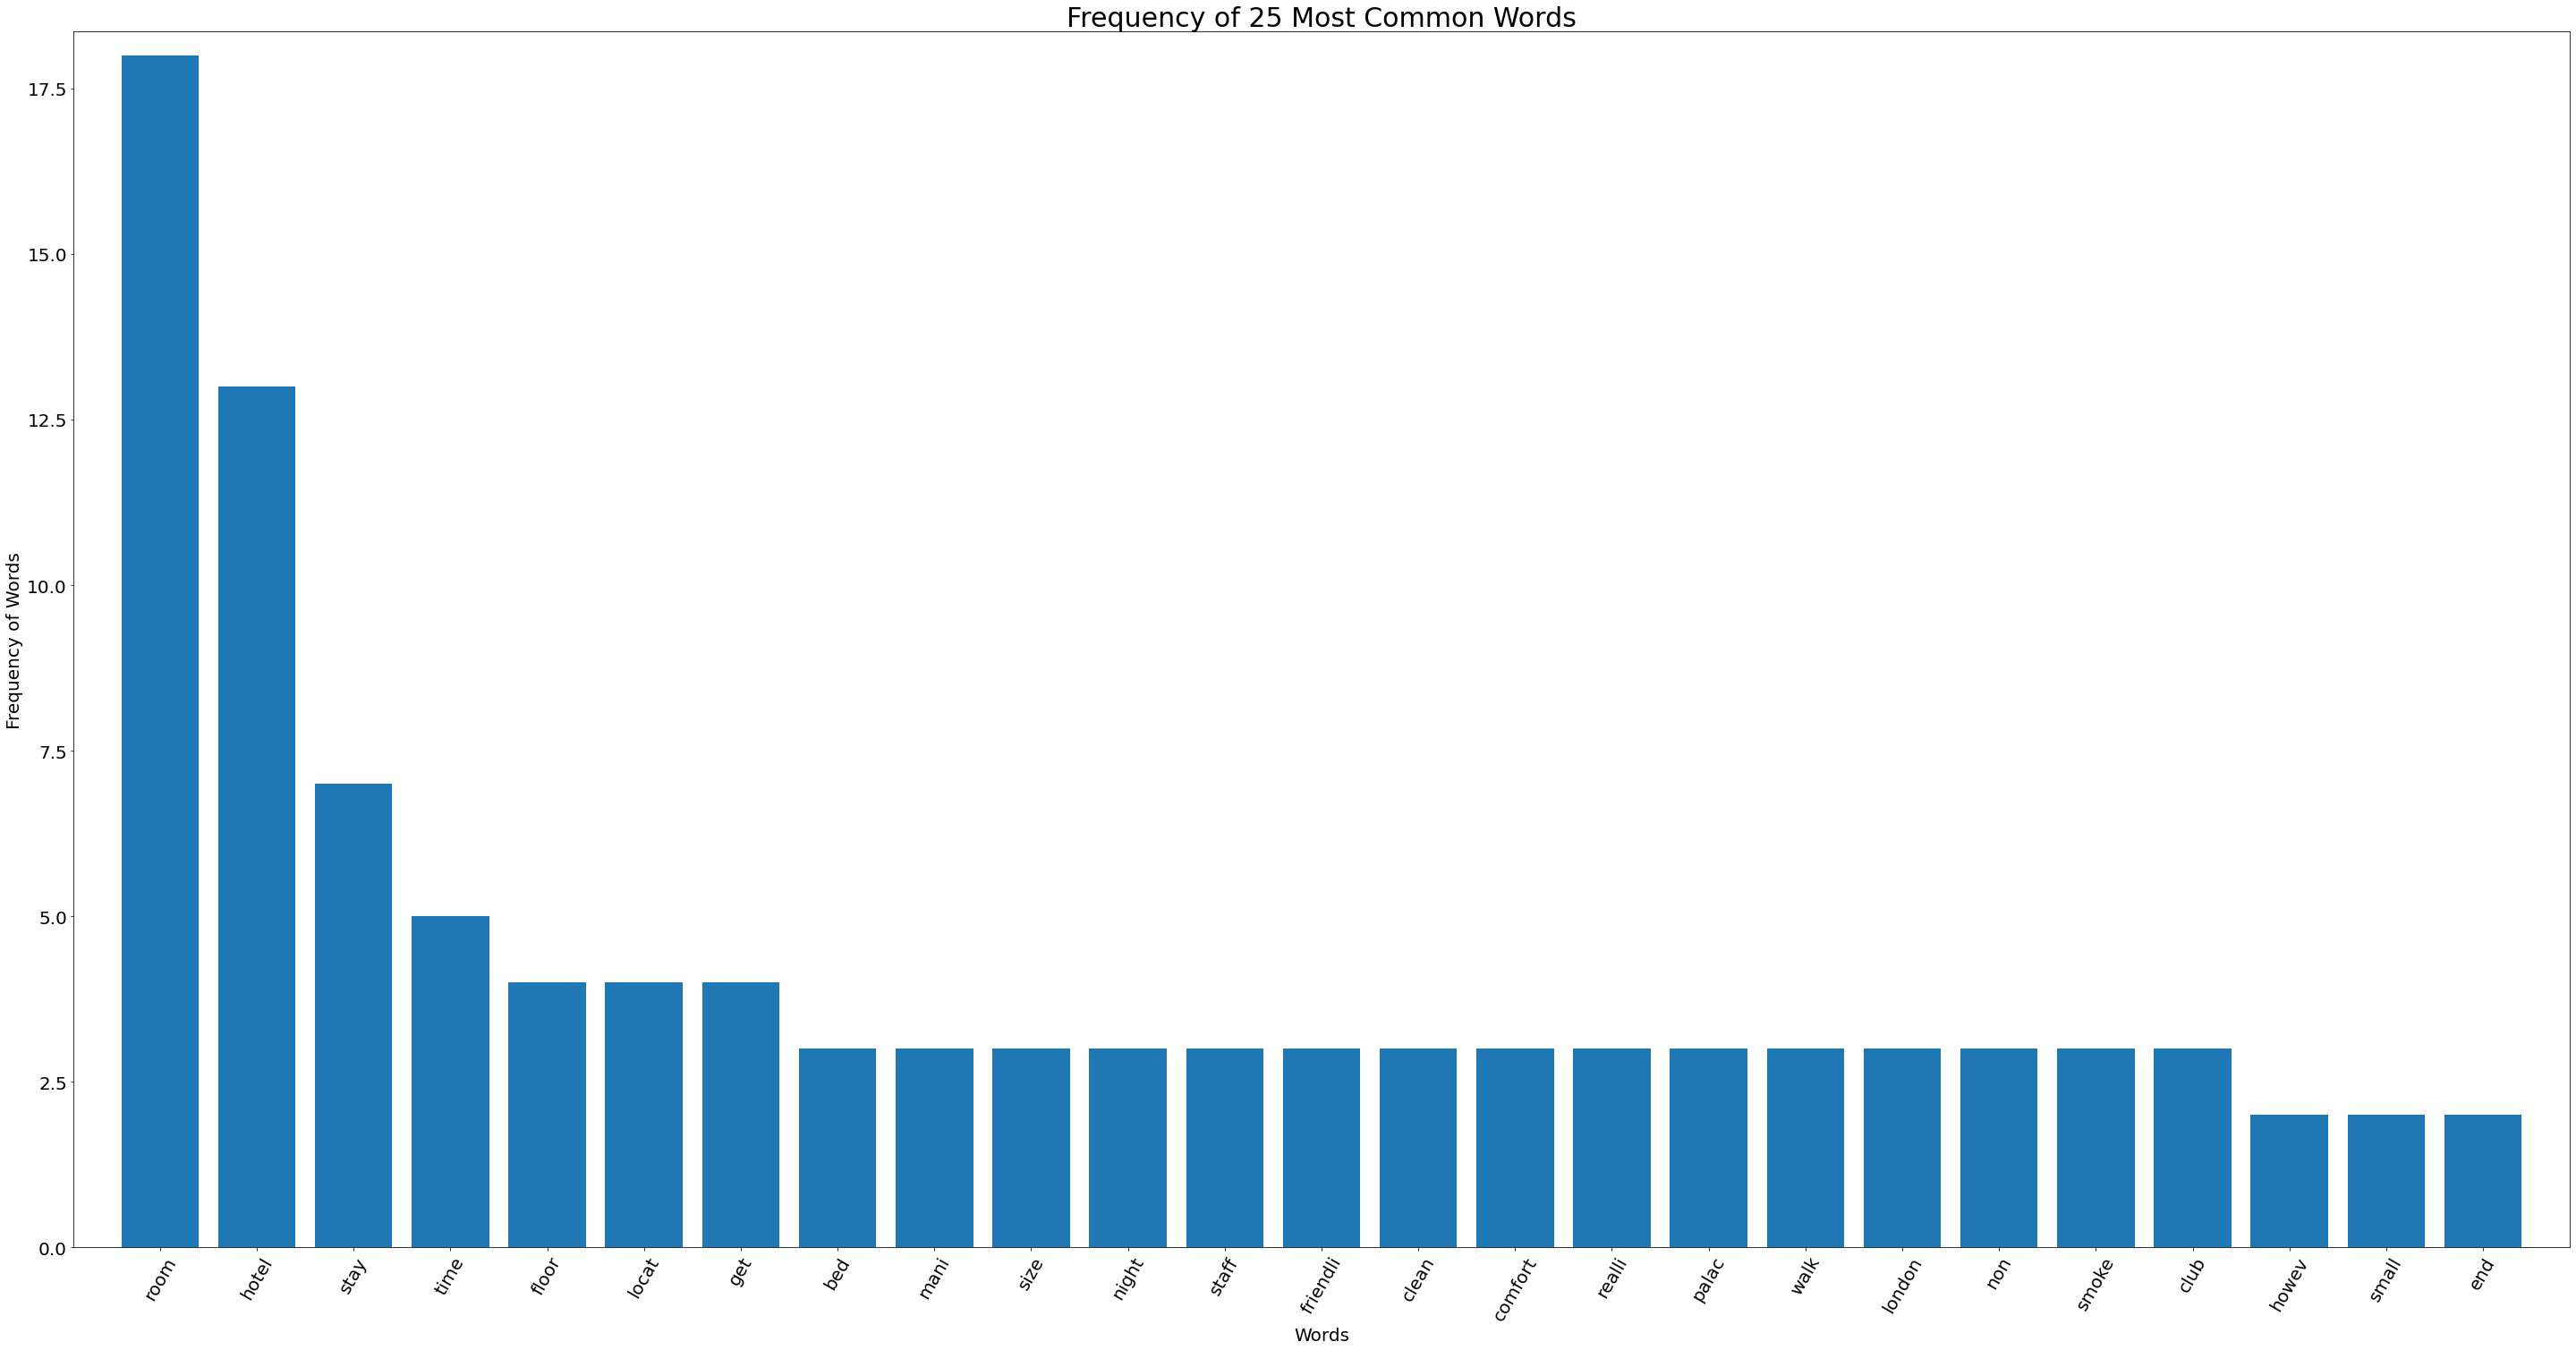

In [ ]:
from nltk.probability import FreqDist
mostcommon_1 = FreqDist(token).most_common(25)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words', fontsize=30)
plt.show()

In [ ]:
#### Bi-Gram Chart

In [ ]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(hotel["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

Bi-gram  Freq
0    convent garden  2995
1      strand palac  2519
2       great locat  1295
3        room small  1278
4        room clean  1198
5    staff friendli  1077
6       stay strand  1074
7      walk distanc  1019
8        stay hotel   897
9   trafalgar squar   855
10       singl room   852
11      palac hotel   842
12       air condit   834
13        one night   767
14   central london   742
15    friendli help   726
16       minut walk   706
17       staff help   643
18   breakfast good   633
19         west end   603
20      hotel great   580
21       hotel room   548
22    would definit   518
23      hotel locat   506
24    central locat   490
25       valu money   481
26    clean comfort   477
27      execut room   477
28      excel locat   457
29        good valu   440

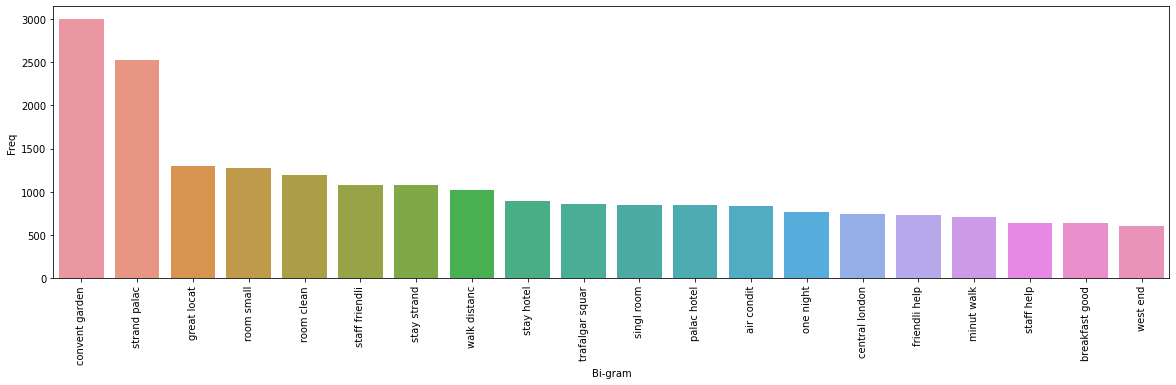

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [ ]:
#### Tri-Gram Chart

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(hotel["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
# Top 20 Tri gram words
top3_df.head(30)

Tri-gram  Freq
0          stay strand palac   930
1         strand palac hotel   826
2        within walk distanc   408
3        staff friendli help   397
4          hotel great locat   349
5             stay one night   310
6        walk convent garden   305
7         would definit stay   256
8       close convent garden   239
9            good valu money   185
10  convent garden trafalgar   181
11    garden trafalgar squar   167
12        room clean comfort   159
13           room air condit   159
14        minut walk convent   148
15     theatr convent garden   147
16      locat convent garden   144
17           air condit room   135
18     convent garden theatr   135
19       near convent garden   134
20      walk trafalgar squar   132
21     would recommend hotel   131
22         easi walk distanc   125
23       share cross station   124
24       friendli help staff   118
25           room quit small   117
26           west end theatr   116
27    convent garden leicest   115
28   would definit recommend   113
29       staff help friendli   112

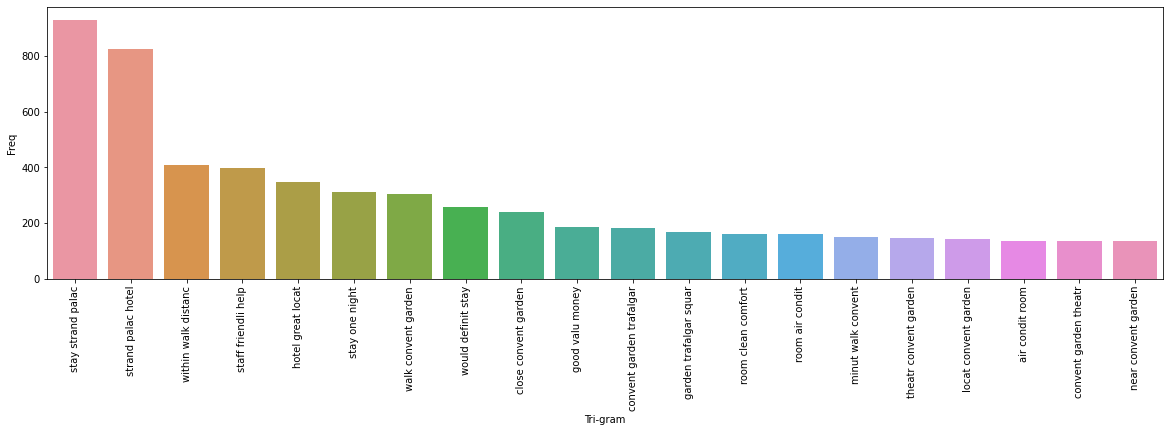

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [ ]:
### Removing some unwanted words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sw_nltk = stopwords.words('english')

In [ ]:
sw_nltk.extend(['howev','ever','particularli','includ','end','put','stop','make','find','hotel','trafalgar','excel','would','realli','also','week','deliveriesrefus','lowandbeholdtwo','back','strand','palac','london','go','come'])

In [ ]:
hotel['cleaned_1'] = hotel['cleaned'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [ ]:
hotel.head()

Reviews  ... sentiment
0  For the location this wasn t too bad  However ...  ...  Negative
1  Spent a couple of nights in this hotel and it ...  ...  Positive
2  My partner and I stayed here and really couldn...  ...  Positive
3  Visited London for three days with my daughter...  ...  Positive
4  Was fantastic to be back in a hotel again and ...  ...  Positive

[5 rows x 19 columns]

In [ ]:
hotel['cleaned_1']=hotel['cleaned_1'].apply(' '.join)

In [ ]:
hotel['cleaned_1']

0        locat bad smallest room stay small doubl bed w...
1        spent coupl night fantast central staff friend...
2        partner stay fault staff friendli noth bother ...
3        visit three day daughter mid juli book late de...
4        fantast somewher central stay time ago pleasan...
                               ...                        
12727    famili stay tripl night feb room clean effici ...
12728    stay christma day locat beat within walk dista...
12729    got long holiday overal stay turn fine take st...
12730    ideal locat within walk distanc squar share cr...
12731    stay busi mani time total sever month standard...
Name: cleaned_1, Length: 12732, dtype: object

In [ ]:
##Building wordcloud after removing unwanted words

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
text = ' '.join(hotel['cleaned_1'])

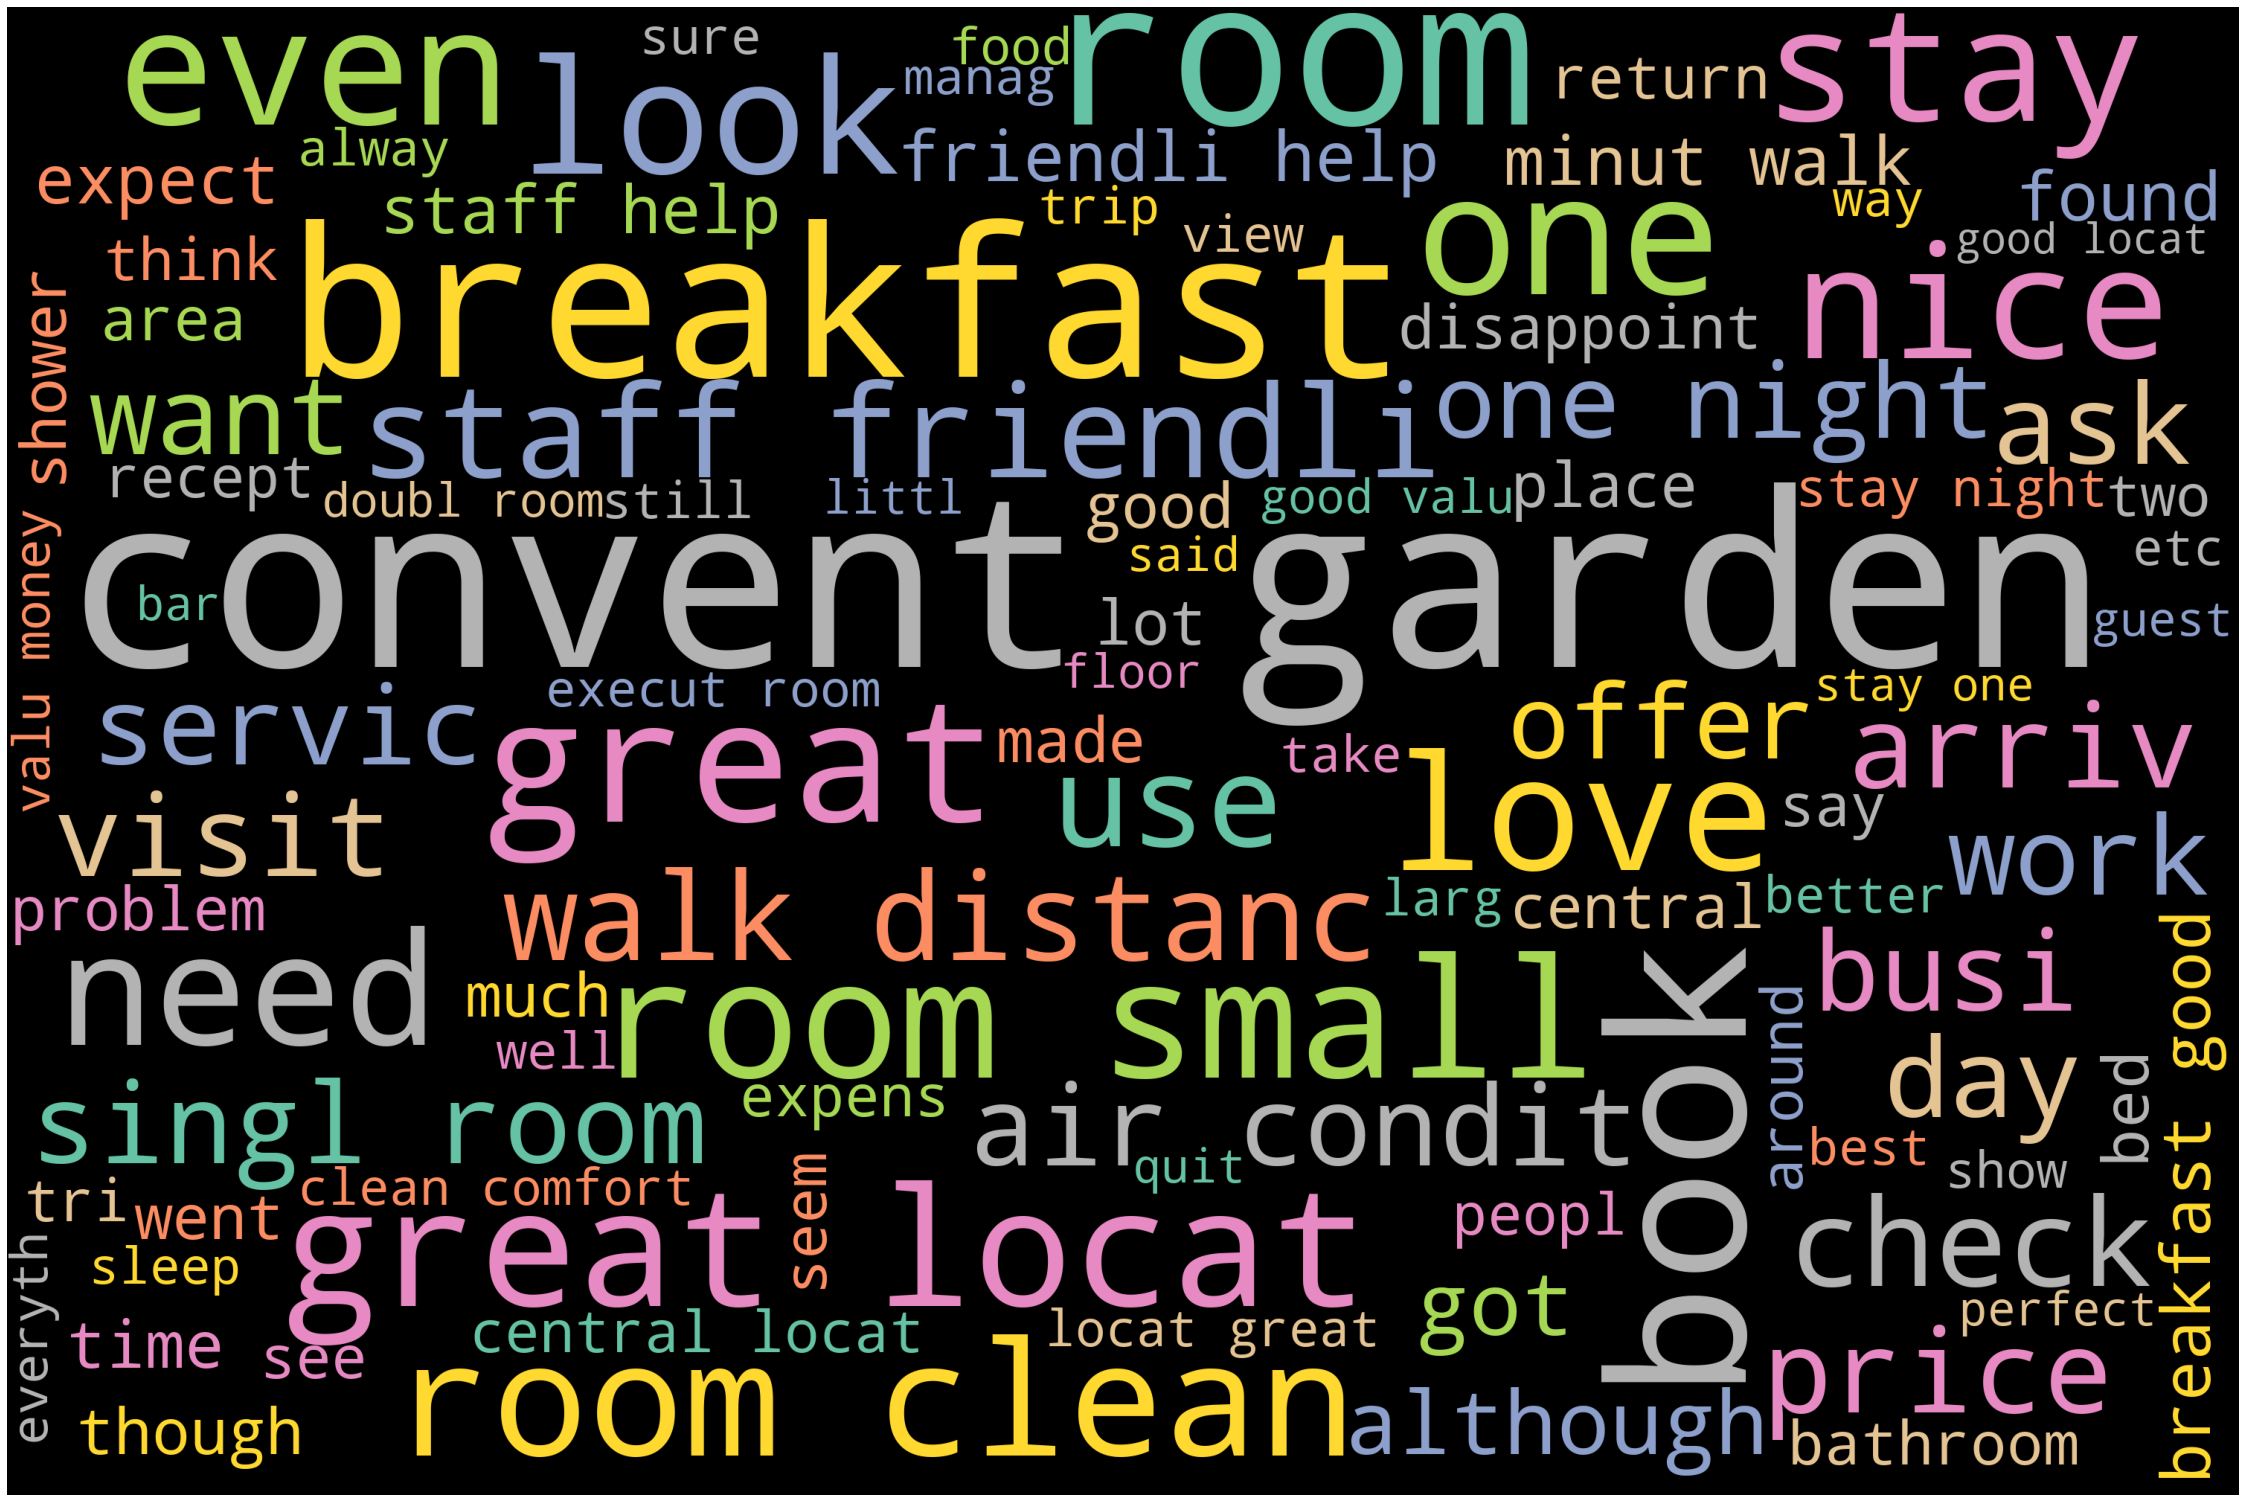

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
#### Sentiment Analysis

In [ ]:
from textblob import TextBlob



In [ ]:
hotel['senti_polar'] = hotel['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )

In [ ]:
hotel[['Reviews','senti_polar']].head()

Reviews  senti_polar
0  For the location this wasn t too bad  However ...    -0.223810
1  Spent a couple of nights in this hotel and it ...     0.191667
2  My partner and I stayed here and really couldn...     0.295238
3  Visited London for three days with my daughter...     0.127778
4  Was fantastic to be back in a hotel again and ...     0.358333

In [ ]:
#### Histogram of Sentiment polarity range 

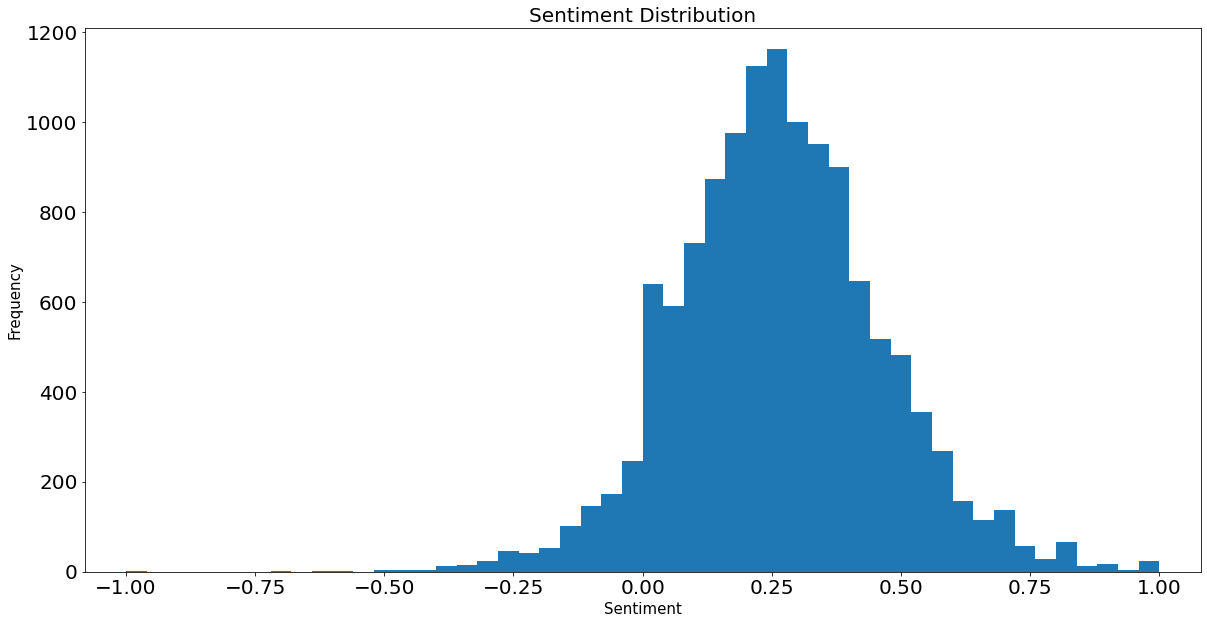

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(hotel['senti_polar'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

In [ ]:
#### Emotion Mining using Afinn dataset

In [ ]:
#Sentiment analysis
afinn = pd.read_csv('/content/sample_data/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
afinn.head() 

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [ ]:
hotel['sentiment_value'] = hotel['lemma'].apply(calculate_sentiment) 

In [ ]:
hotel[['Reviews','sentiment_value']]

Reviews  sentiment_value
0      For the location this wasn t too bad  However ...               -6
1      Spent a couple of nights in this hotel and it ...                9
2      My partner and I stayed here and really couldn...               11
3      Visited London for three days with my daughter...               11
4      Was fantastic to be back in a hotel again and ...                6
...                                                  ...              ...
12727  My family of 3 stayed in a triple for 9 nights...                8
12728  I stayed here just after Christmas for a few d...                9
12729  We just got back from a week long holiday in L...               12
12730  The Strand Palace is ideally located on the St...                7
12731  Have stayed on business here many times  total...                5

[12732 rows x 2 columns]

In [ ]:
# Sentiment score of the whole review
hotel['sentiment_value'].describe()

count    12732.000000
mean         7.699576
std          5.906997
min        -15.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         40.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
hotel[hotel['sentiment_value']<=0]

Reviews  ... sentiment
0      For the location this wasn t too bad  However ...  ...  Negative
5      For the location this wasn t too bad  However ...  ...  Negative
26     Looked a 3 night stay  breakfast was a samples...  ...   Neutral
44     Terrible customer service  I tried to book a s...  ...  Negative
49     This is my first choice of a place to stay in ...  ...  Negative
...                                                  ...  ...       ...
12712  I was in London on a temporary work assignment...  ...  Negative
12716  November 7  2003 just returned from first visi...  ...  Negative
12721  I stayed at the Strand Palace hotel for 1 nigh...  ...  Negative
12723  I have never been so horrified in my life  Wal...  ...  Negative
12725  I stayed in the Strand Palace in December 2001...  ...  Negative

[1278 rows x 19 columns]

In [ ]:
hotel[hotel['sentiment_value']>=20]

Reviews  ... sentiment
24     Perfect location  2 minute walk from Convent G...  ...  Positive
40     A very well appointed hotel almost opposite th...  ...  Positive
42     Lovely  clean hotel with lovely interior and f...  ...  Positive
46     A short stay while having a city break to Lond...  ...  Positive
51     I booked The Strand Palace Hotel as a surprise...  ...  Positive
...                                                  ...  ...       ...
12604  After reading reviews  I arrived for a 6 night...  ...  Positive
12607  We stayed at this hotel for a one night theatr...  ...  Positive
12638  We just returned from Europe on Sept  7  2005 ...  ...  Positive
12645  Stayed here on a one fighter  Location is exce...  ...  Positive
12673  We stayed here for a long weekend 28th to 3oth...  ...  Positive

[432 rows x 19 columns]

In [ ]:
hotel['index']=range(0,len(hotel)) 

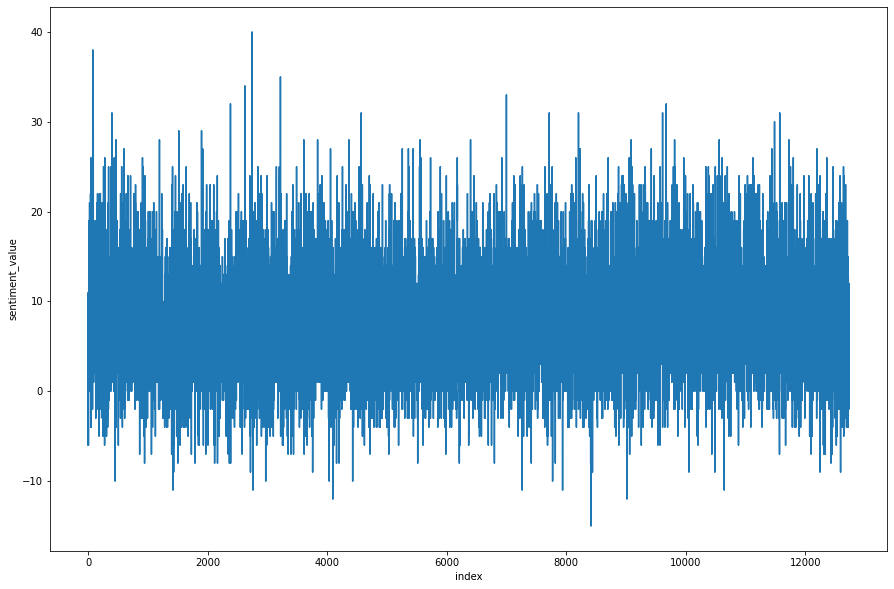

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=hotel) 

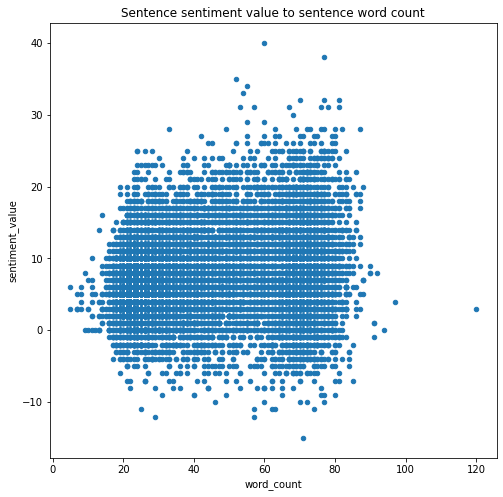

In [ ]:
hotel.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [ ]:
hotel['sentiment'] = hotel['sentiment_value'].apply(lambda x : 'Positive' if x > 0 else ('Negative' if x<0 else 'Neutral'))

In [ ]:
hotel['sentiment']

0        Negative
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
12727    Positive
12728    Positive
12729    Positive
12730    Positive
12731    Positive
Name: sentiment, Length: 12732, dtype: object

In [ ]:
Neutral_senti=hotel[hotel['sentiment_value']==0]

In [ ]:
Positive_senti=hotel[hotel['sentiment_value']>0]

In [ ]:
Negative_senti=hotel[hotel['sentiment_value']<0]

In [ ]:
Neutral_senti

Reviews  ... sentiment
26     Looked a 3 night stay  breakfast was a samples...  ...   Neutral
127    The hotel was well located  in a lively neighb...  ...   Neutral
187    The best thing about this hotel is it s locati...  ...   Neutral
230    The location for us was excellent   We were se...  ...   Neutral
293    I have lost count of the amount of times I hav...  ...   Neutral
...                                                  ...  ...       ...
12646  I have stayed at The Strand palace now for a f...  ...   Neutral
12651  Ok  good location  average sized room but that...  ...   Neutral
12660  This hotel is very centrally located in London...  ...   Neutral
12709  Great location  but that s all it has going fo...  ...   Neutral
12711  The Strand Palace does have a great location  ...  ...   Neutral

[459 rows x 19 columns]

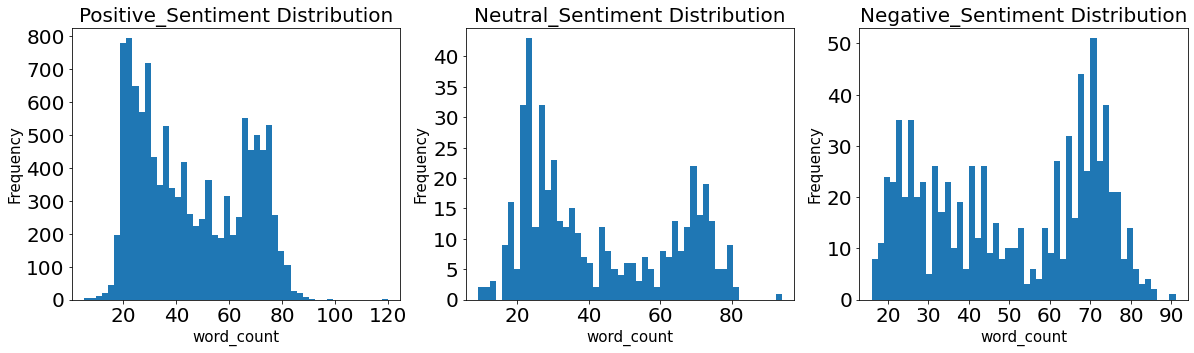

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Positive_senti['word_count'], bins=50)
plt.title('Positive_Sentiment Distribution', fontsize=20)
plt.subplot(1,3,2)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Neutral_senti['word_count'], bins=50)
plt.title('Neutral_Sentiment Distribution', fontsize=20)
plt.subplot(1,3,3)
plt.margins(0.04)
plt.xlabel('word_count', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(Negative_senti['word_count'], bins=50)
plt.title('Negative_Sentiment Distribution', fontsize=20)

plt.show()

In [ ]:
## Wordcloud for Positive reviews.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
text = ' '.join(Positive_senti['cleaned_1'])

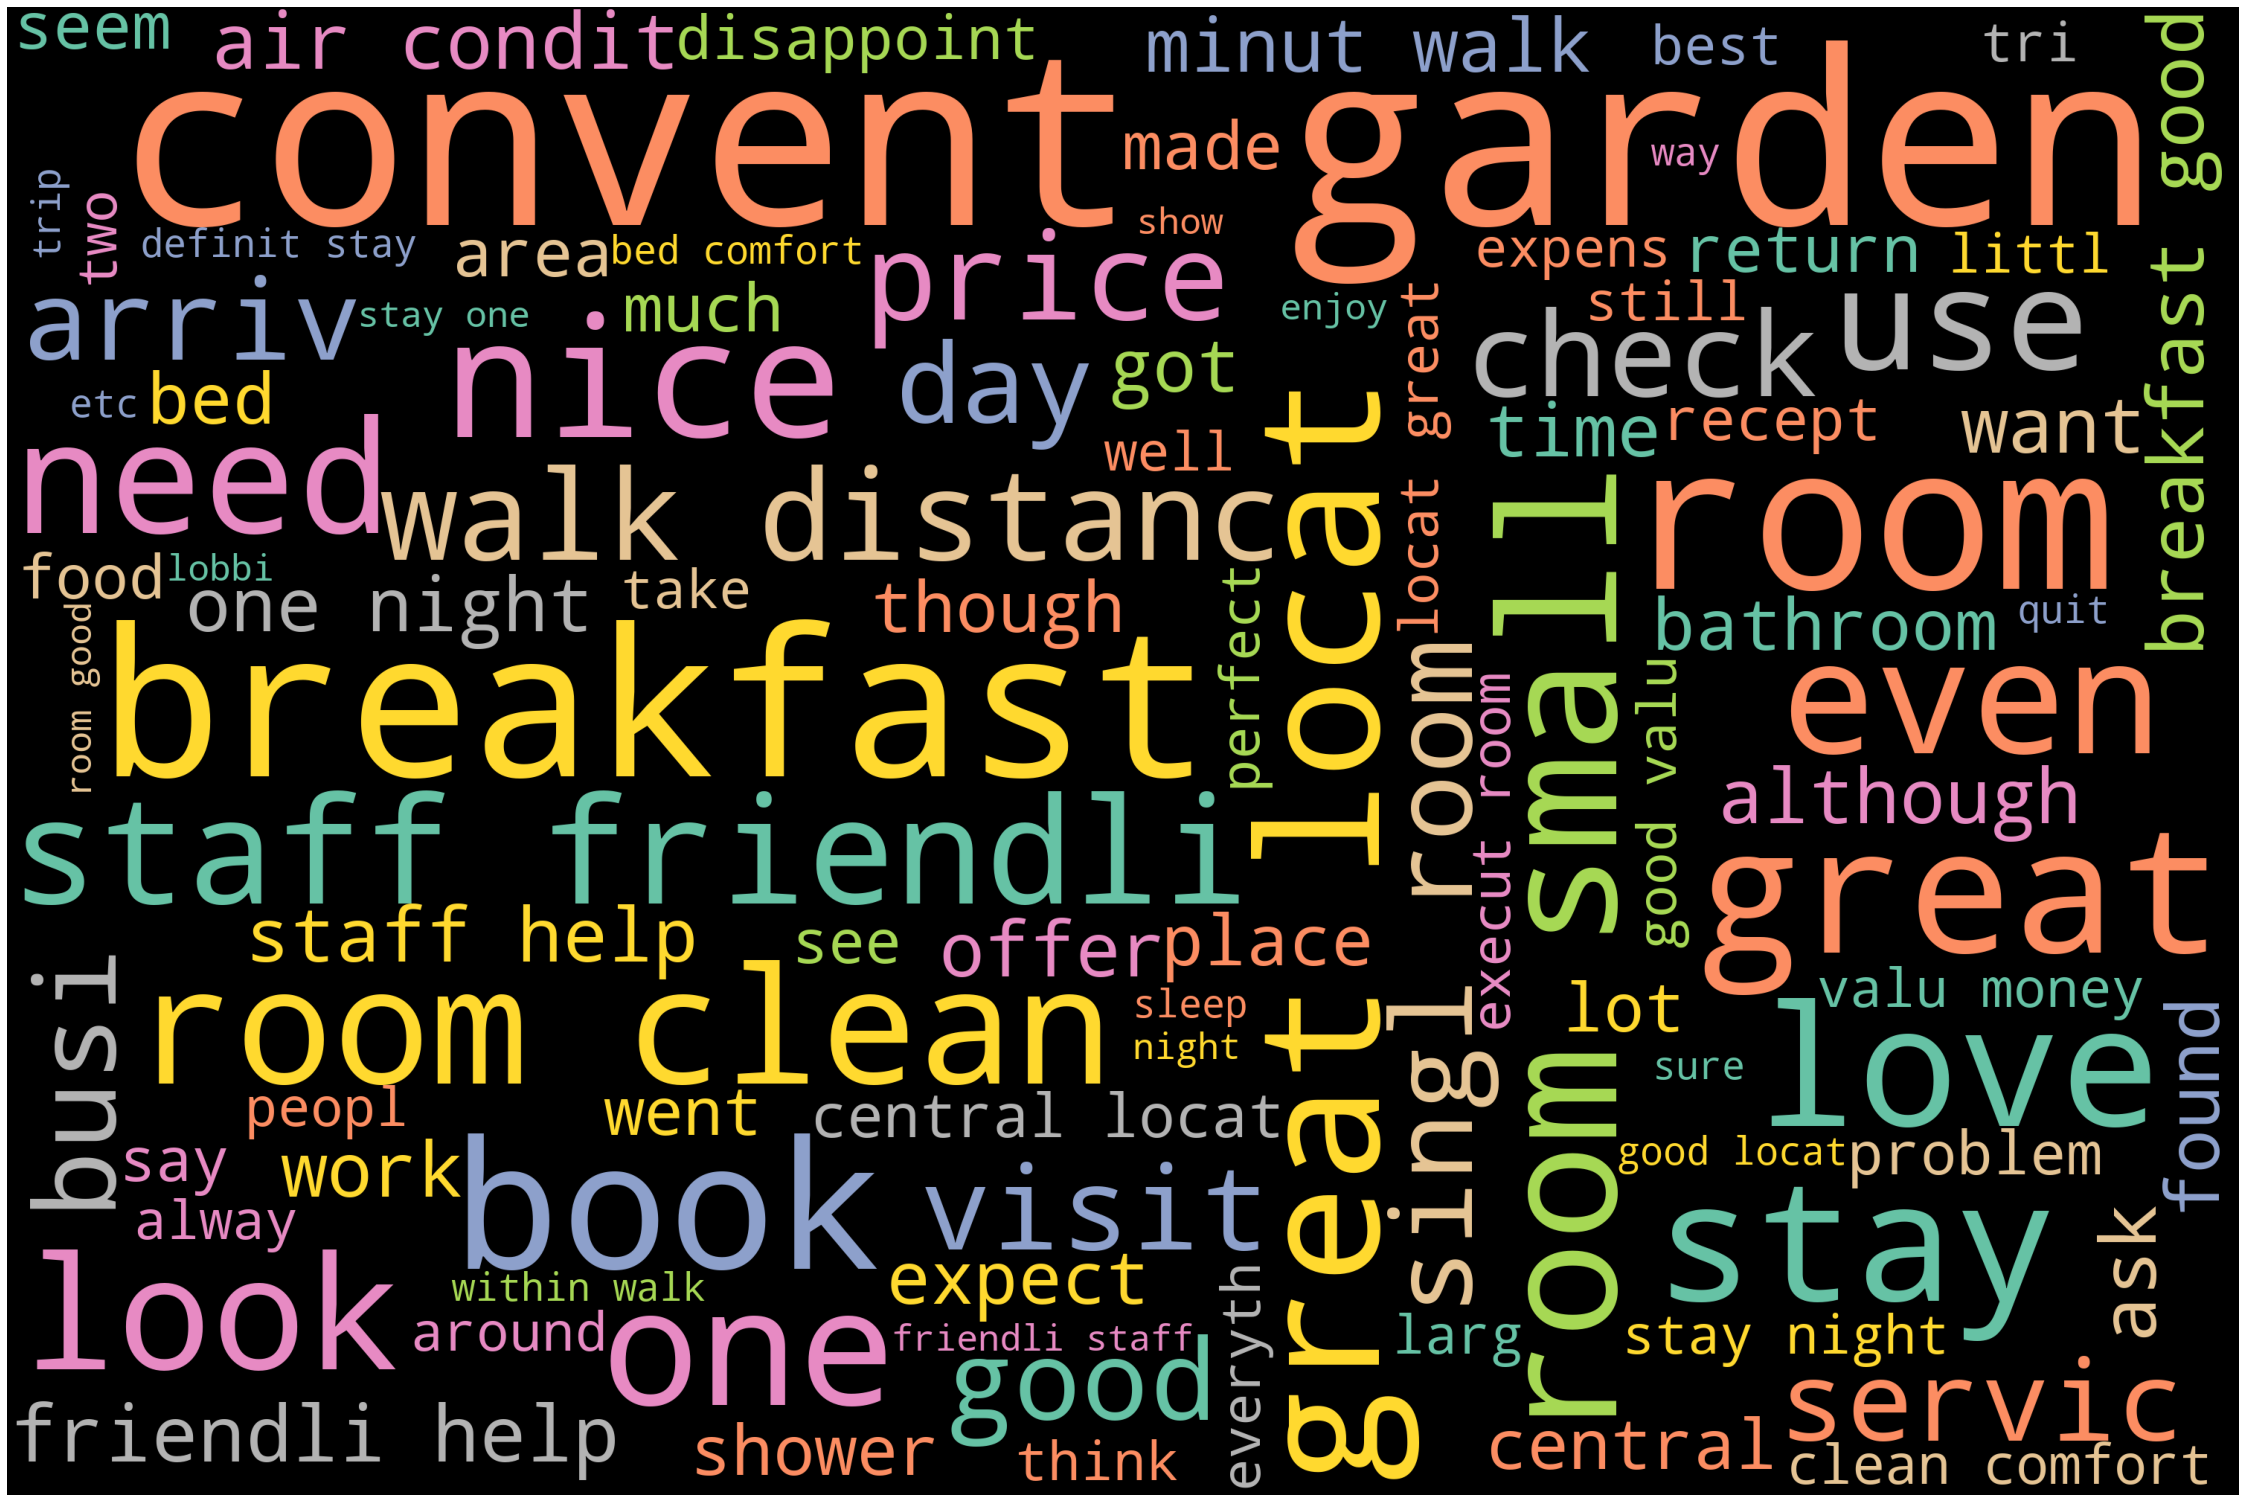

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
## Wordcloud for Neutral reviews.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
text = ' '.join(Neutral_senti['cleaned_1'])

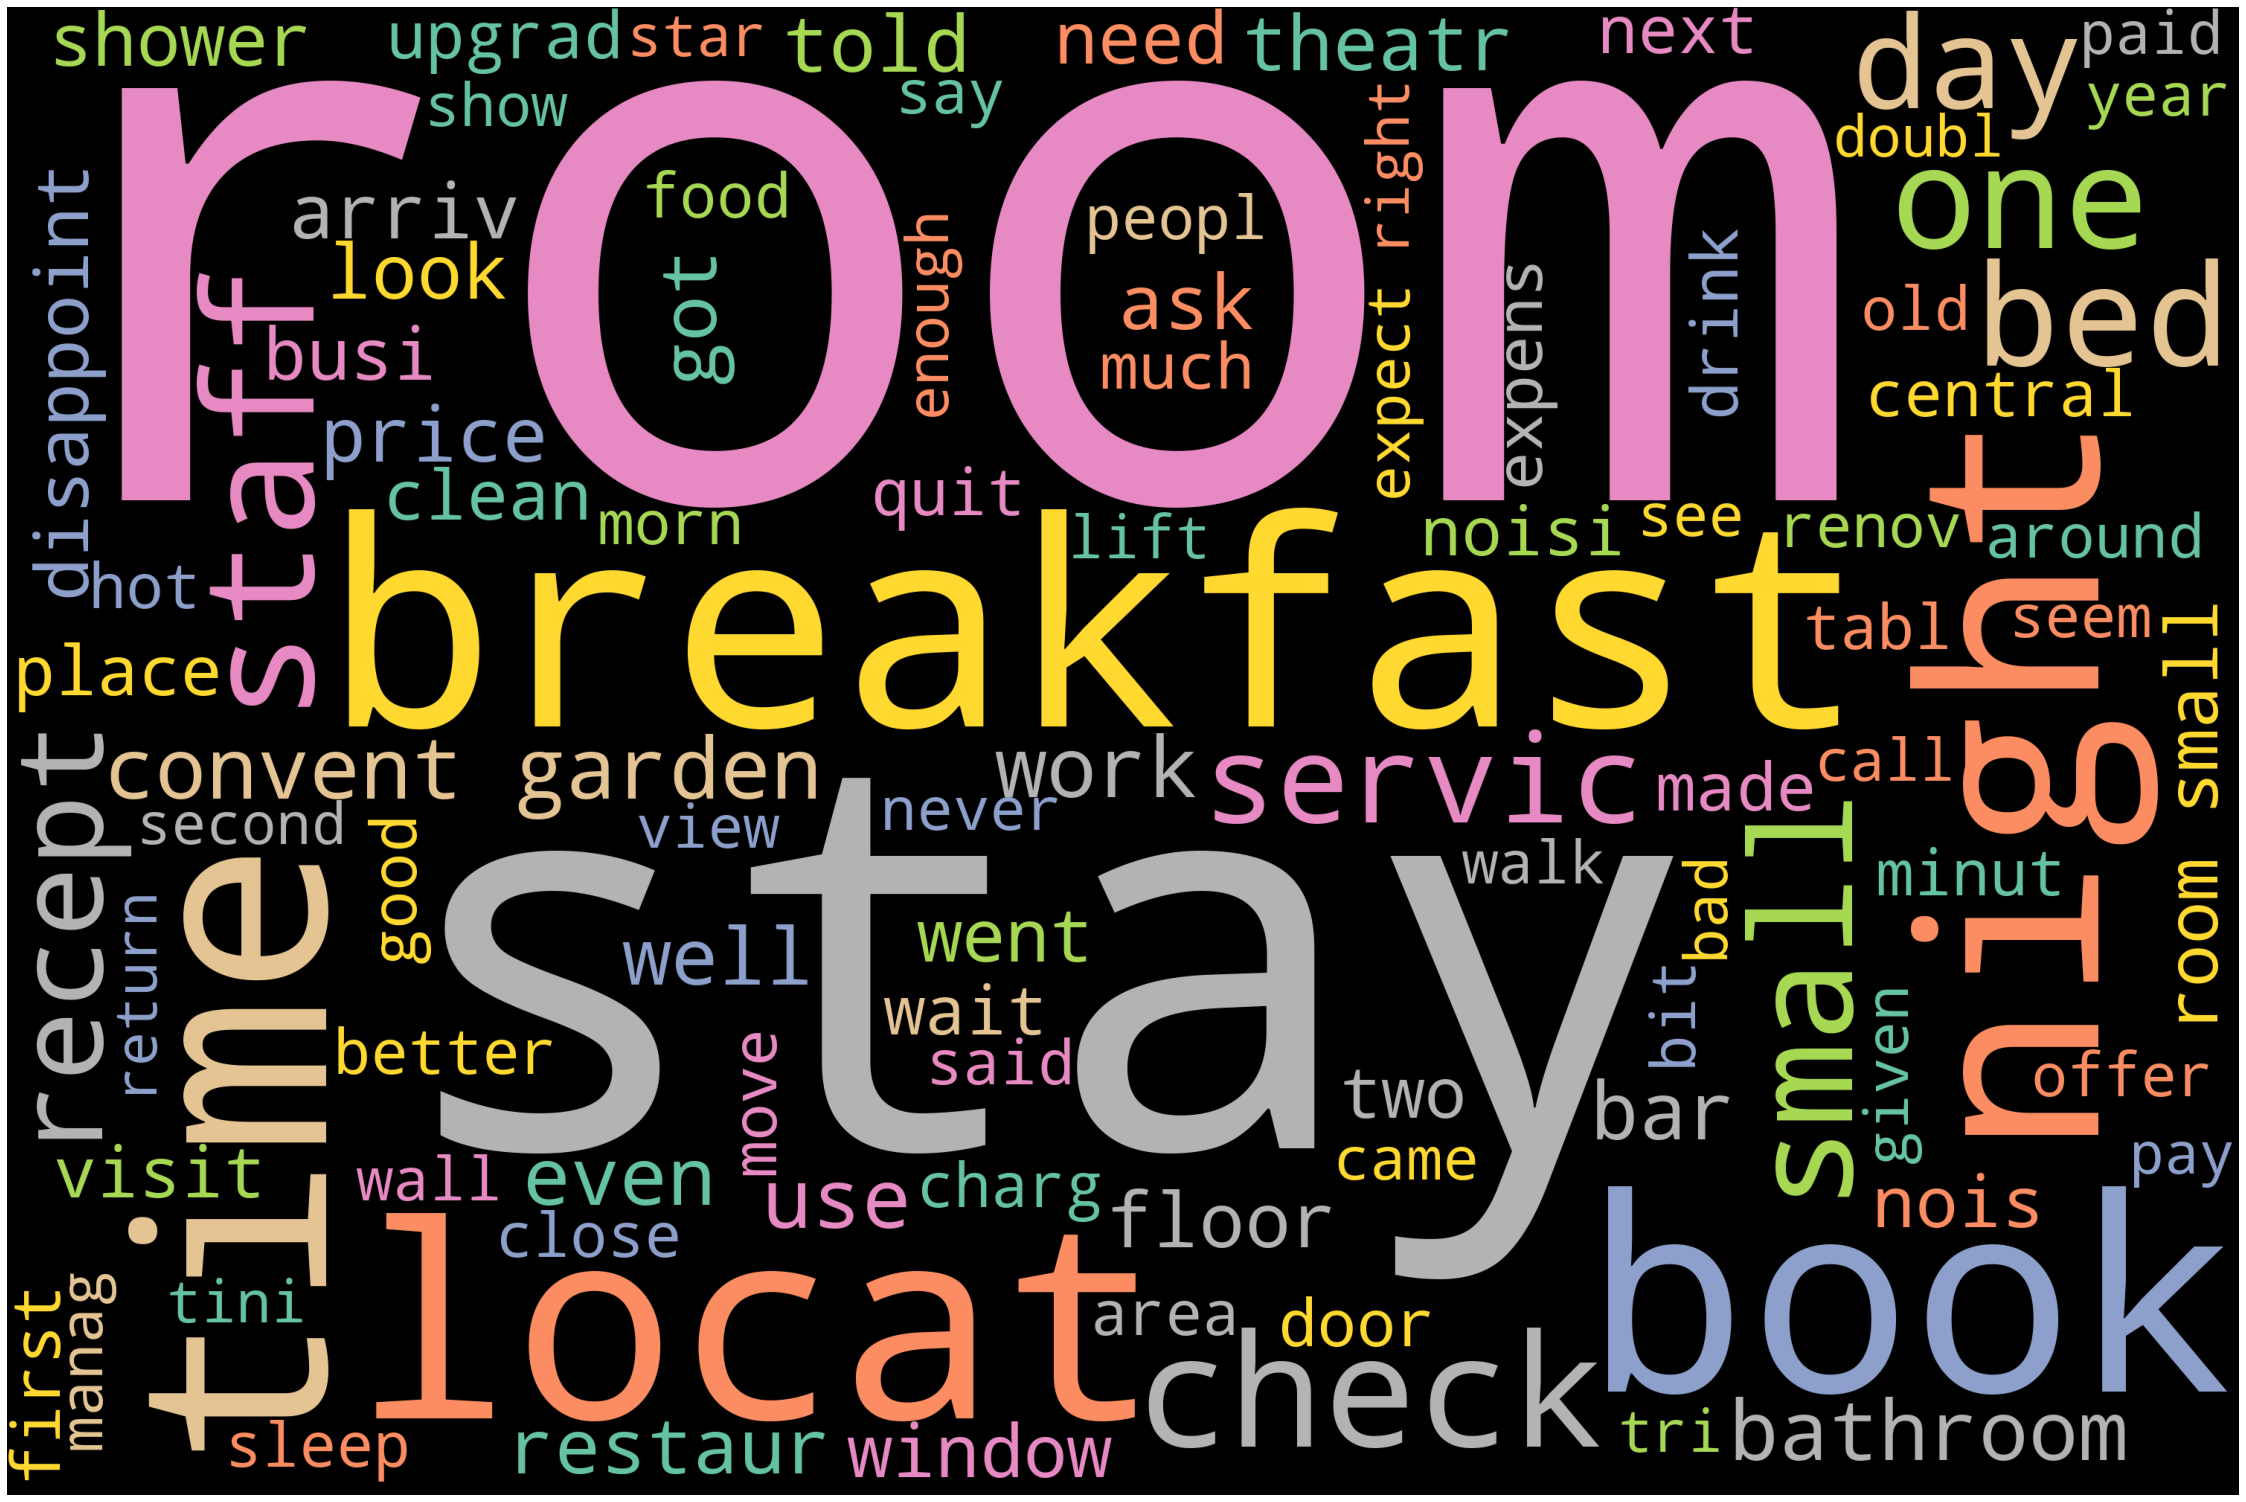

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
## Wordcloud for Negative reviews.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
text = ' '.join(Negative_senti['cleaned_1'])

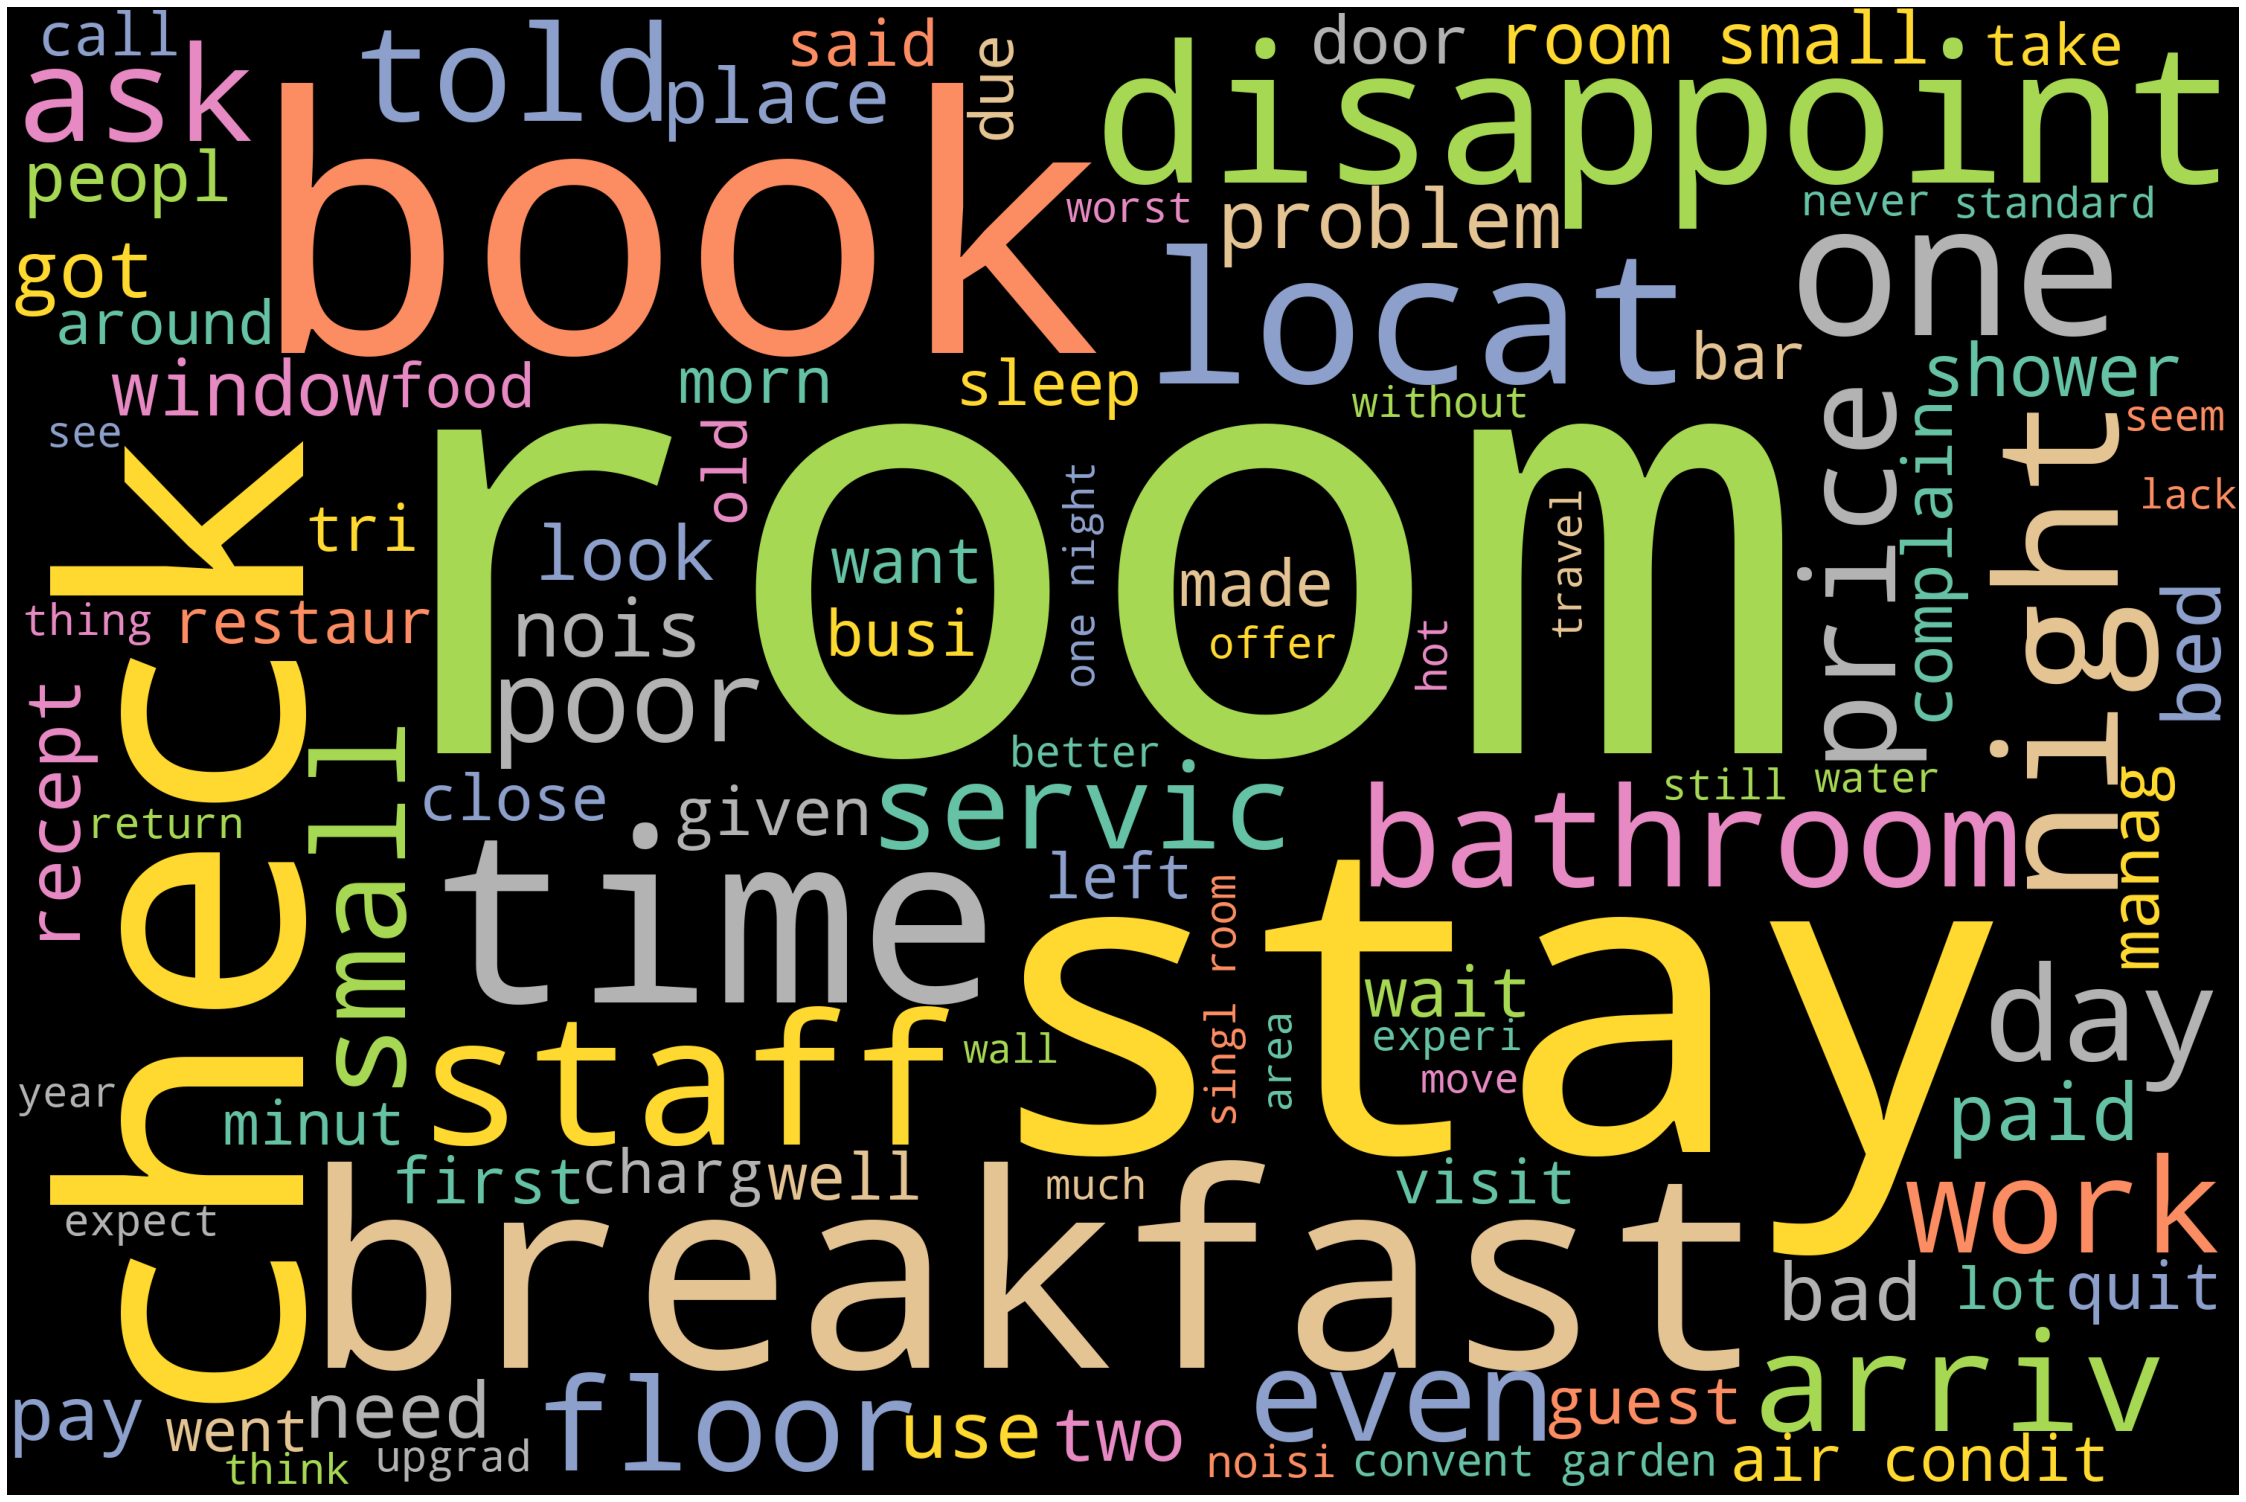

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

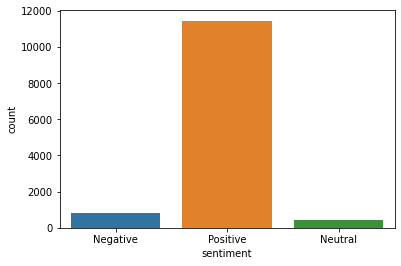

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment',data=hotel)
plt.show()

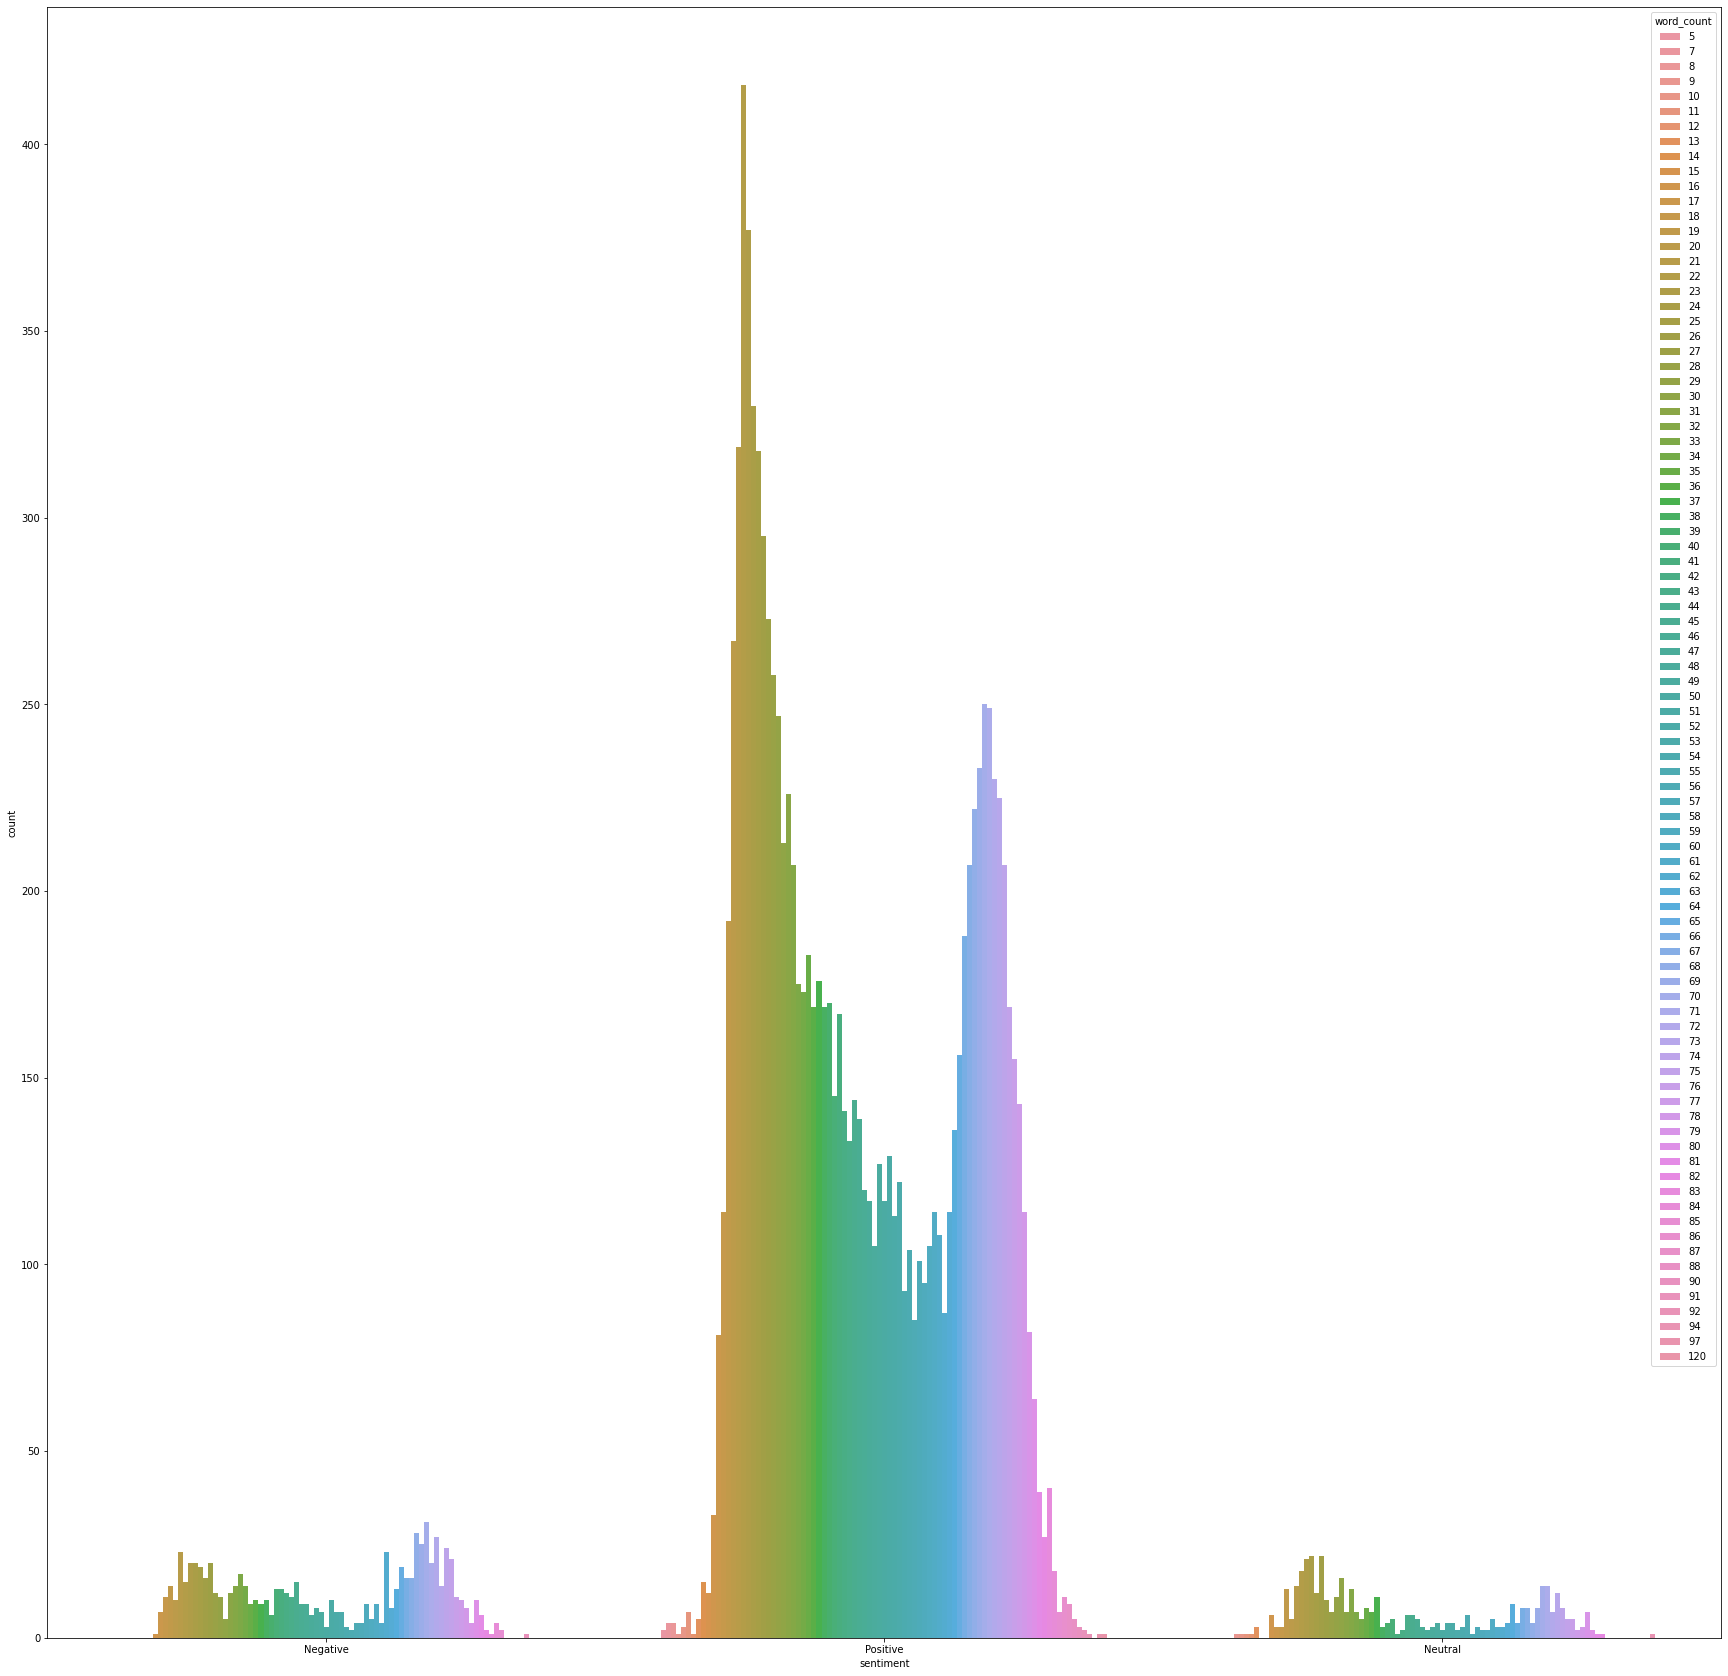

In [ ]:
plt.figure(figsize=(30, 30))
sns.countplot(x='sentiment',hue='word_count',data=hotel)
plt.show()

In [ ]:
##Feature Extraction

In [ ]:
# for positive reviews

In [ ]:
Positive_senti.head()

Reviews  ... sentiment
1  Spent a couple of nights in this hotel and it ...  ...  Positive
2  My partner and I stayed here and really couldn...  ...  Positive
3  Visited London for three days with my daughter...  ...  Positive
4  Was fantastic to be back in a hotel again and ...  ...  Positive
6  Spent a couple of nights in this hotel and it ...  ...  Positive

[5 rows x 19 columns]

In [ ]:
positive_rev=Positive_senti['cleaned_1']

In [ ]:
positive_rev=pd.DataFrame(data=positive_rev)

In [ ]:
positive_rev

cleaned_1
1      spent coupl night fantast central staff friend...
2      partner stay fault staff friendli noth bother ...
3      visit three day daughter mid juli book late de...
4      fantast somewher central stay time ago pleasan...
6      spent coupl night fantast central staff friend...
...                                                  ...
12727  famili stay tripl night feb room clean effici ...
12728  stay christma day locat beat within walk dista...
12729  got long holiday overal stay turn fine take st...
12730  ideal locat within walk distanc squar share cr...
12731  stay busi mani time total sever month standard...

[11454 rows x 1 columns]

### Count Vectorization on Positive reviews

In [ ]:
positive_rev = [cleaned_1.strip() for cleaned_1 in positive_rev.cleaned_1] # remove both the leading and the trailing characters
positive_rev = [cleaned_1 for cleaned_1 in positive_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
positive_rev[0:10] 

['spent coupl night fantast central staff friendli help clean safe comfort stay highli recommend',
 'partner stay fault staff friendli noth bother troubl icon someon within minut fix flight night time watch luggag free charg moham friendli help locat amaz convent garden squar bottom street buckingham minut walk water eye central clean modern fresh bed comfort great view definit recommend',
 'visit three day daughter mid juli book late deal got fantast price b b delux room arriv earli room readi staff help check u keep case whilst went explor visit one hottest year air condit room bless bed comfort sofa bed room could made need room face directli shutter close practic silent disturb sleep night room decor modern clean comfort plenti space u alongsid mini bar love room shower room',
 'fantast somewher central stay time ago pleasant surpris massiv overhaul place yet still keep sympathet price good valu',
 'spent coupl night fantast central staff friendli help clean safe comfort stay highl

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_rev) 

In [ ]:
print(vectorizer.vocabulary_)

{'spent': 6347, 'coupl': 1557, 'night': 4520, 'fantast': 2475, 'central': 1087, 'staff': 6414, 'friendli': 2750, 'help': 3175, 'clean': 1241, 'safe': 5814, 'comfort': 1346, 'stay': 6456, 'highli': 3201, 'recommend': 5488, 'partner': 4874, 'fault': 2493, 'noth': 4575, 'bother': 772, 'troubl': 7073, 'icon': 3346, 'someon': 6271, 'within': 7646, 'minut': 4280, 'fix': 2586, 'flight': 2619, 'time': 6911, 'watch': 7512, 'luggag': 4008, 'free': 2730, 'charg': 1120, 'moham': 4332, 'locat': 3948, 'amaz': 222, 'convent': 1497, 'garden': 2816, 'squar': 6400, 'bottom': 778, 'street': 6528, 'buckingham': 877, 'walk': 7479, 'water': 7513, 'eye': 2430, 'modern': 4324, 'fresh': 2742, 'bed': 581, 'great': 2972, 'view': 7421, 'definit': 1781, 'visit': 7440, 'three': 6873, 'day': 1723, 'daughter': 1716, 'mid': 4230, 'juli': 3667, 'book': 754, 'late': 3801, 'deal': 1733, 'got': 2933, 'price': 5227, 'delux': 1802, 'room': 5749, 'arriv': 364, 'earli': 2132, 'readi': 5450, 'check': 1140, 'keep': 3692, 'case'

In [ ]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

In [ ]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
5749        room        19761
6456        stay         9485
3948       locat         7799
2923        good         6621
6414       staff         6247
...          ...          ...
5745         roo            1
3002     grouchi            1
3001   grottiest            1
5750     roommat            1
7754  zyrafalgar            1

[7755 rows x 2 columns]

### Count Vectorization on Negative reviews


In [ ]:
negative_rev=Negative_senti['cleaned_1']
negative_rev=pd.DataFrame(data=negative_rev)

In [ ]:
negative_rev = [cleaned_1.strip() for cleaned_1 in negative_rev.cleaned_1] # remove both the leading and the trailing characters
negative_rev = [cleaned_1 for cleaned_1 in negative_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
negative_rev[0:10] 

['locat bad smallest room stay small doubl bed wall com pair room mani bathroom floor larg towel floor stare consist long black hair bed duet pull anoth next time poor welcom robot size busi chun guest lucki stay one night',
 'locat bad smallest room stay small doubl bed wall com pair room mani bathroom floor larg towel floor stare consist long black hair bed duet pull anoth next time poor welcom robot size busi chun guest lucki stay one night',
 'terribl custom servic tri book singl room septemb last year thiago may websit crash twice gave receiv confirm e mail assum work fast forward may blue charg credit card two room never use knew total tri call brush book administr told could noth tri email manag directli complain receiv repli feel complet rip angri even tri either ebook new date offer refund taken consider amount money noth utterli appal',
 'first choic place stay day reason price room avail sometim pay bit extra everywher happen inexpens particular date thing done right staff f

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_rev)

In [ ]:
print(vectorizer.vocabulary_)

{'locat': 1815, 'bad': 235, 'smallest': 2863, 'room': 2648, 'stay': 2982, 'small': 2861, 'doubl': 937, 'bed': 278, 'wall': 3462, 'com': 596, 'pair': 2224, 'mani': 1870, 'bathroom': 263, 'floor': 1243, 'larg': 1741, 'towel': 3237, 'stare': 2974, 'consist': 660, 'long': 1822, 'black': 318, 'hair': 1414, 'duet': 977, 'pull': 2449, 'anoth': 132, 'next': 2072, 'time': 3197, 'poor': 2345, 'welcom': 3499, 'robot': 2642, 'size': 2836, 'busi': 427, 'chun': 543, 'guest': 1403, 'lucki': 1840, 'one': 2153, 'night': 2076, 'terribl': 3148, 'custom': 768, 'servic': 2761, 'tri': 3267, 'book': 348, 'singl': 2824, 'septemb': 2756, 'last': 1745, 'year': 3588, 'thiago': 3167, 'may': 1902, 'websit': 3490, 'crash': 734, 'twice': 3296, 'gave': 1331, 'receiv': 2517, 'confirm': 650, 'mail': 1857, 'assum': 192, 'work': 3560, 'fast': 1172, 'forward': 1276, 'blue': 332, 'charg': 506, 'credit': 741, 'card': 454, 'two': 3299, 'never': 2065, 'use': 3388, 'knew': 1719, 'total': 3231, 'call': 438, 'brush': 400, 'admin

In [ ]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

In [ ]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
2648       room         1699
2982       stay          614
2076      night          377
516       check          316
348        book          314
...         ...          ...
2514  reburbish            1
2513  rebellion            1
2512    reassur            1
1278        fot            1
3601        zoo            1

[3602 rows x 2 columns]

#### TFidf vectorizer 
Positive Reviews

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(positive_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['aaron', 'abbey', 'abl', 'abl check', 'abl get', 'abl leav', 'abl open', 'abl walk', 'absolut', 'absolut fantast', 'absolut love', 'absolut perfect', 'accept', 'access', 'access convent', 'access convent garden', 'access room', 'access theatr', 'access tube', 'accommod', 'accommod room', 'account', 'across', 'across road', 'across road savoy', 'across savoy', 'across street', 'across street savoy', 'action', 'activ', 'actress', 'actual', 'ad', 'ad room', 'adapt', 'add', 'addit', 'address', 'adequ', 'adequ clean', 'adequ need', 'adequ room', 'adequ size', 'adjac', 'adjac room', 'adjoin', 'adjust', 'admit', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advisor', 'affect', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'age', 'agent', 'ago', 'agre', 'ahead', 'air', 'air con', 'air con room', 'air condit', 'air condit fan', 'air condit room', 'air condit unit', 'air condit window', 'air condition', 'air room', 'aircondit', 'airport', 'alarm', 'albeit', 'aldrich', 'allen

#### TFidf vectorizer 
Negative reviews

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(negative_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['___', 'abl', 'abl check', 'abl get', 'abrupt', 'absolut', 'accept', 'access', 'access room', 'accommod', 'accord', 'account', 'across', 'act', 'actor', 'actress', 'actual', 'actual quit', 'actual room', 'ad', 'ad room', 'adapt', 'add', 'addit', 'address', 'adequ', 'adequ night', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'admit', 'admittedli', 'adult', 'advanc', 'advanc paid', 'advantag', 'advertis', 'advic', 'advis', 'affect', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'afternoon tea disappoint', 'age', 'agenc', 'agent', 'ago', 'agre', 'ahead', 'aid', 'air', 'air co', 'air con', 'air con room', 'air condit', 'air condit heat', 'air condit room', 'air condit unit', 'air room', 'airflow', 'airport', 'akin', 'alarm', 'alarm went', 'albeit', 'alloc', 'alloc room', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alreadi paid', 'altern', 'although', 'although room', 'alway', 'alway book', 'alway book execut', 'alway engag', 'alway happi', 'alway like', 'alway stay', 'alway thought

#Bi-gram for Positive reviews

In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Positive_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

Bi-gram  Freq
0   convent garden  2861
1      great locat  1294
2       room clean  1199
3       room small  1192
4   staff friendli  1092
5     walk distanc   981
6       singl room   774
7       air condit   731
8    friendli help   729
9   breakfast good   704
10       one night   686
11      staff help   673
12      minut walk   666
13   central locat   498
14   clean comfort   477
15      stay night   462
16      valu money   454
17       good valu   443
18     locat great   443
19     execut room   429
20    definit stay   420
21     bed comfort   407
22      good locat   407
23     within walk   406
24  friendli staff   397
25        stay one   391
26      doubl room   387
27       room good   385
28     share cross   385
29    tube station   377

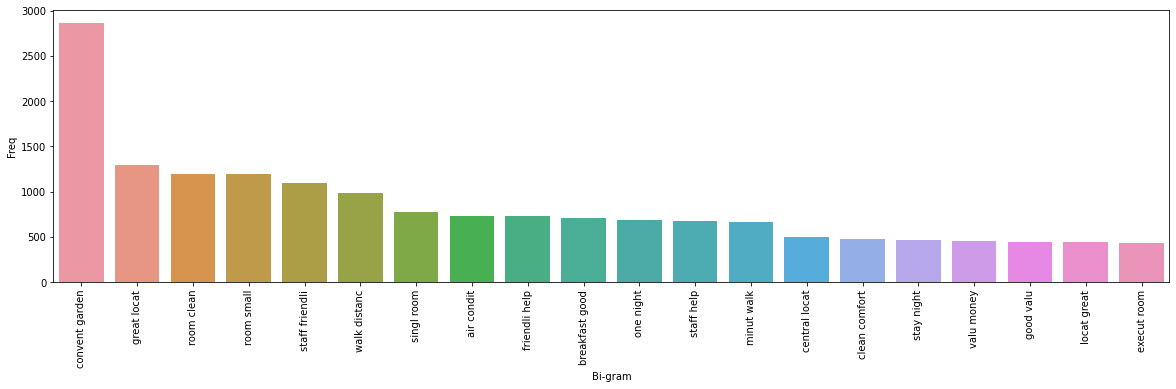

In [ ]:

#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);


#Bi-gram for Negative reviews

In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Negative_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)


Bi-gram  Freq
0       room small    94
1       air condit    77
2   convent garden    68
3       singl room    58
4        one night    55
5      execut room    42
6      room servic    36
7       doubl room    34
8        room tini    34
9       room readi    33
10      stay night    32
11      fire alarm    30
12      night stay    30
13        stay one    28
14      small room    28
15   standard room    28
16   custom servic    27
17     earli check    27
18     window open    26
19    walk distanc    26
20       two night    26
21         air con    25
22       room room    24
23      front desk    24
24        room air    24
25      room floor    23
26  staff friendli    22
27      anoth room    22
28       per night    21
29      minut walk    21

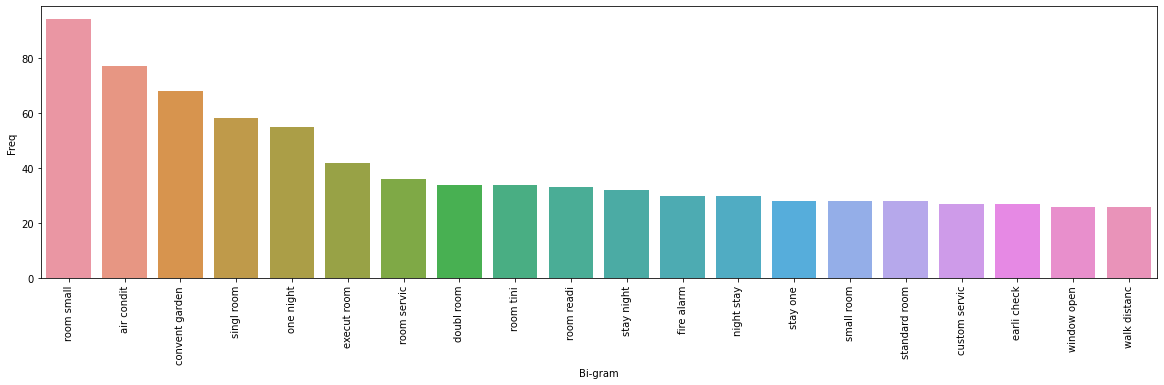

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#Tri-gram for Positive reviews

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(Positive_senti['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(30)

Tri-gram  Freq
0      staff friendli help   420
1      within walk distanc   394
2           stay one night   334
3      walk convent garden   304
4     close convent garden   226
5          good valu money   187
6     locat convent garden   166
7     convent garden squar   161
8       room clean comfort   159
9       minut walk convent   143
10   theatr convent garden   140
11         room air condit   138
12   convent garden theatr   132
13          stay mani time   129
14         air condit room   128
15     near convent garden   128
16         tea coffe facil   122
17       easi walk distanc   121
18     friendli help staff   119
19     share cross station   119
20  convent garden leicest   117
21    garden leicest squar   114
22          stay two night   114
23         room quit small   113
24     staff help friendli   112
25         stay sever time   111
26        good night sleep   106
27        room small clean   106
28          room good size   105
29    squar convent garden   105

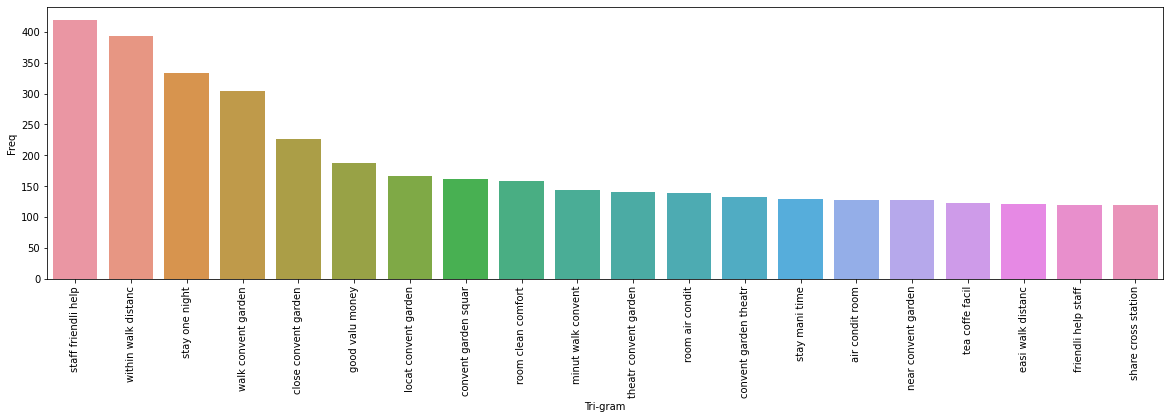

In [ ]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

#Tri-gram for Negative reviews

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [ ]:
top3_words = get_top_n3_words(Negative_senti['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(30)


Tri-gram  Freq
0          stay one night    20
1         room air condit    19
2          stay mani time    10
3     within walk distanc    10
4       room extrem small     8
5         lack air condit     8
6         air condit room     7
7         night busi trip     7
8         fire alarm went     6
9          wait long time     6
10         room small old     6
11        paper thin wall     6
12        stay singl room     6
13    standard doubl room     6
14        move anoth room     6
15    walk convent garden     6
16        stay sever time     6
17           air con room     6
18        wall paper thin     6
19        room small dark     6
20  theatr convent garden     6
21         one night busi     6
22         two night stay     6
23         doubl bed wall     5
24      charg credit card     5
25       room first floor     5
26       singl room small     5
27        poor valu money     5
28         ask chang room     5
29         room next door     5

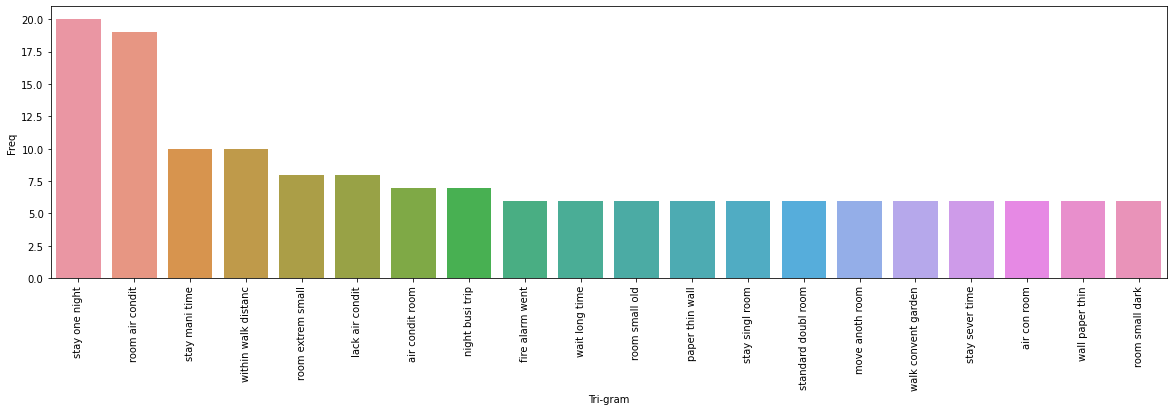

In [ ]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

###From bi-gram and tri gram for positive reviews and Negative reviews it is clear that room size,air condition, staff etc are resposible for rating of the hotel.

In [ ]:
hotel.head()

Reviews  ... sentiment
0  For the location this wasn t too bad  However ...  ...  Negative
1  Spent a couple of nights in this hotel and it ...  ...  Positive
2  My partner and I stayed here and really couldn...  ...  Positive
3  Visited London for three days with my daughter...  ...  Positive
4  Was fantastic to be back in a hotel again and ...  ...  Positive

[5 rows x 19 columns]

In [ ]:
hotel.to_csv(r'cleaneddata.csv',index=True)